In [1]:
import os 
import sys
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [2]:
sys.path.insert(0, '/home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Scripts/Analysis')
from prepare_results import average_power_arrays
from plotting import plot_animals_by_channels

# HET ANALYSIS

In [13]:
sleepstage = 'WAKE'

In [14]:
file_list = os.listdir('/home/melissa/RESULTS/GRIN2B/Entire_Power_Arrays/HET/' + sleepstage + '/')
os.chdir('/home/melissa/RESULTS/GRIN2B/Entire_Power_Arrays/HET/' + sleepstage + '/')
anim_id_list = []
for file in file_list:
    anim_id = file[0:3]
    anim_id_list.append(anim_id)

In [22]:
id_list = list(set(anim_id_list))
#id_list.remove('.ip')
id_list = ['227',
 '129',
 '139',
 '130',
 '424',
 '137',
 '131',
 '241',
 '433',
 '239',
 '237',
 '368',
 '236',
 '373',
 '229',
 '364',
 '138',
 '367'] #139

In [16]:
channel_list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
plot_colors = ['orange', 'orangered', 'orangered', 'gold','yellowgreen','darkseagreen','lightgreen','darkolivegreen',
         'teal', 'skyblue', 'darkblue',  'plum', 'darkviolet', 'black', 'slategrey', 'slategrey', 'silver']
save_directory = '/home/melissa/RESULTS/GRIN2B/Entire_Power_Arrays/PLOTS/' + sleepstage + '/HET/'

In [17]:
#os.listdir('/home/melissa/RESULTS/GRIN2B/Entire_Power_Arrays/HET/' + sleepstage)

227
129
139
130
424
137
131
241
433
239
237
368
236
373
229
364
138
367


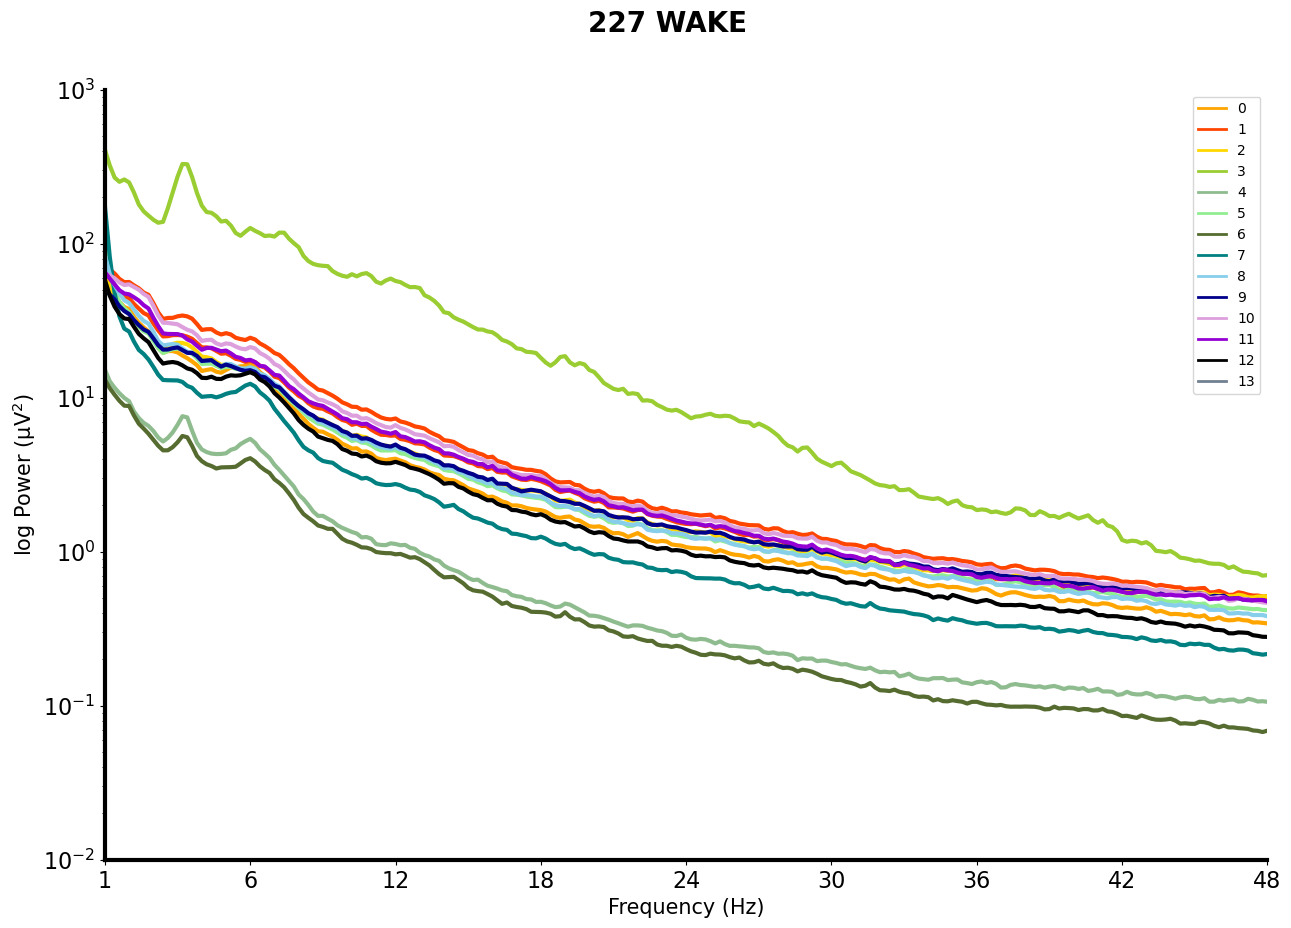

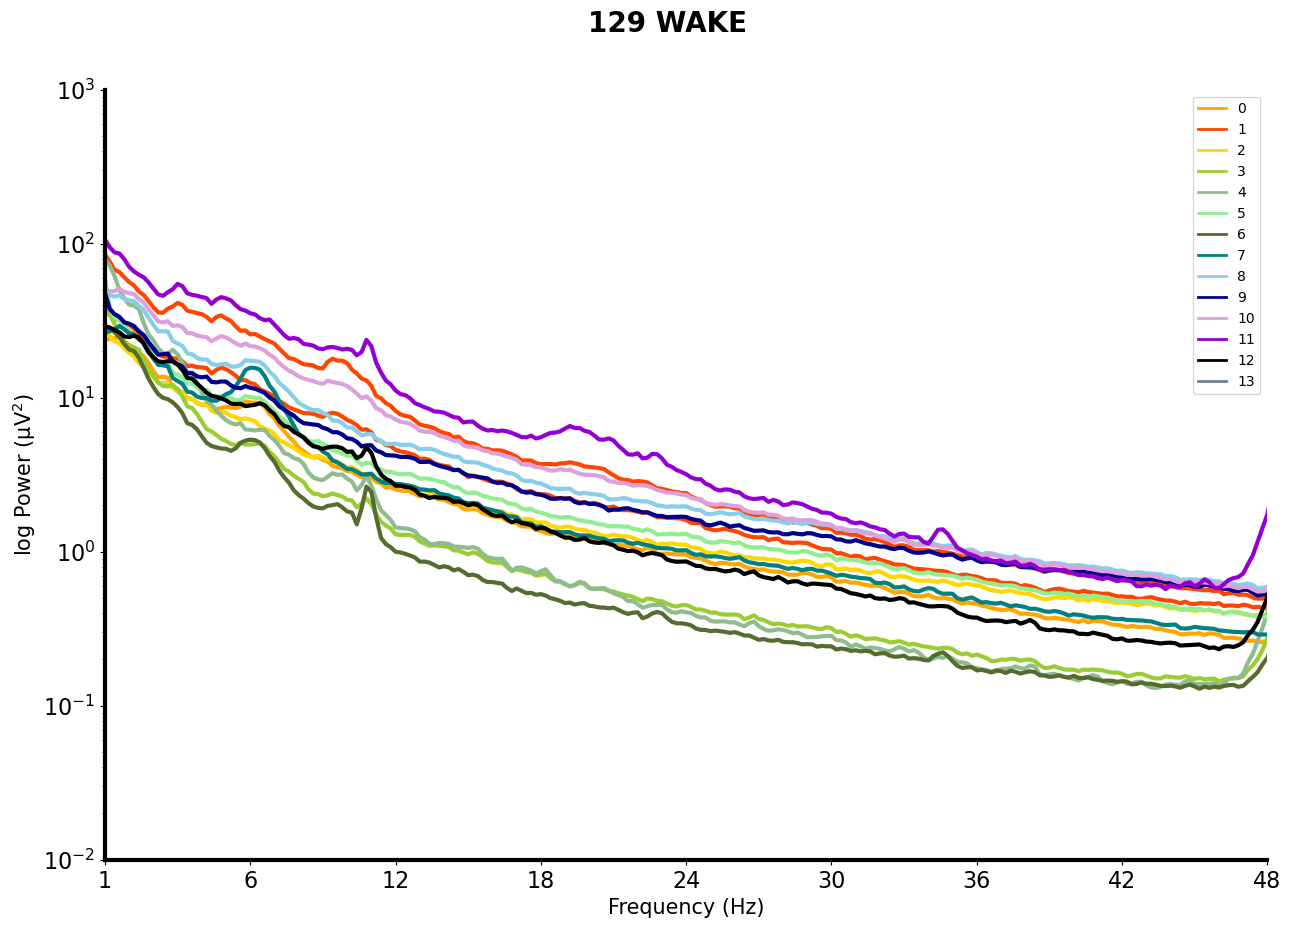

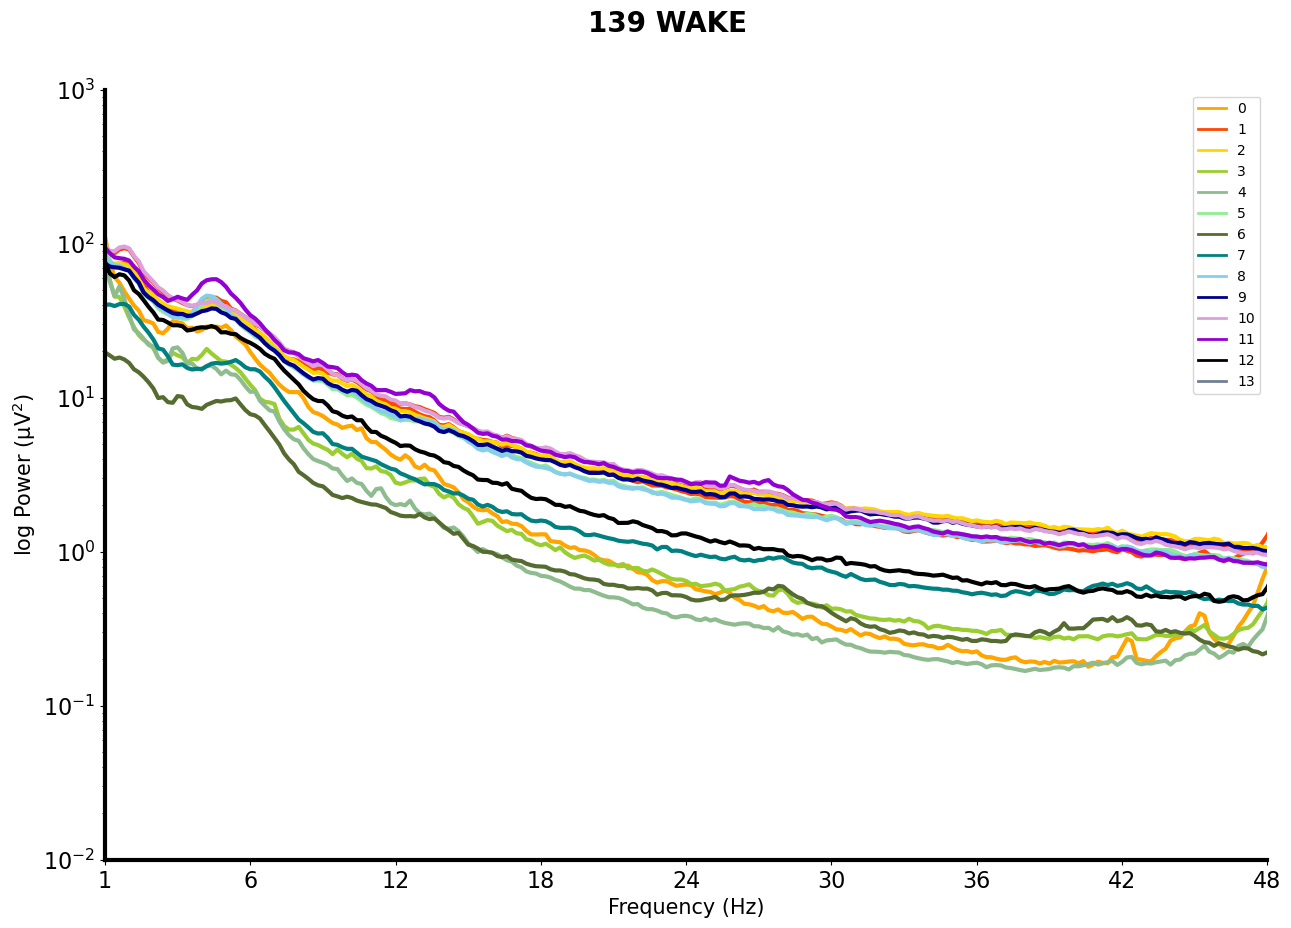

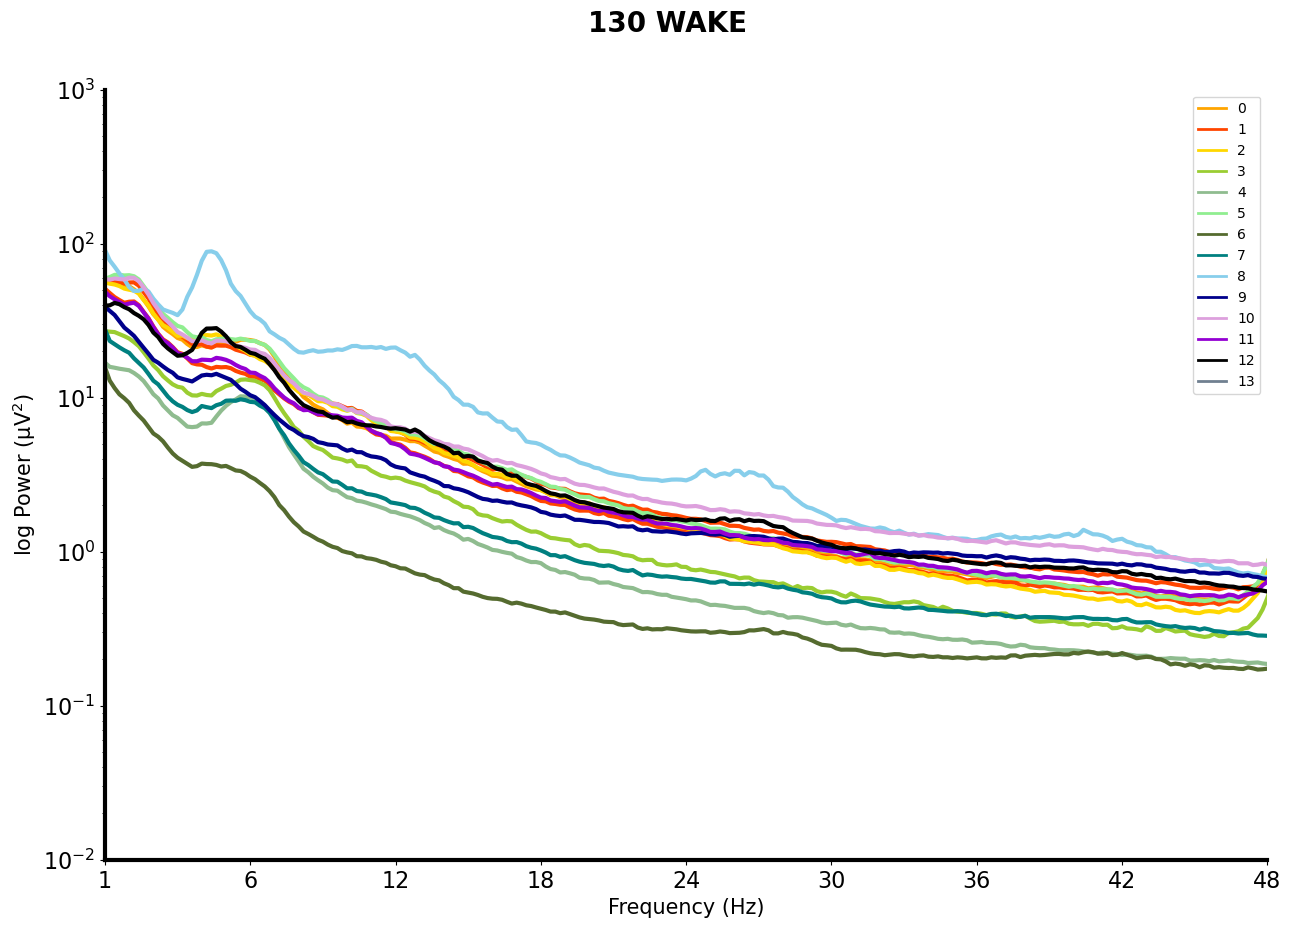

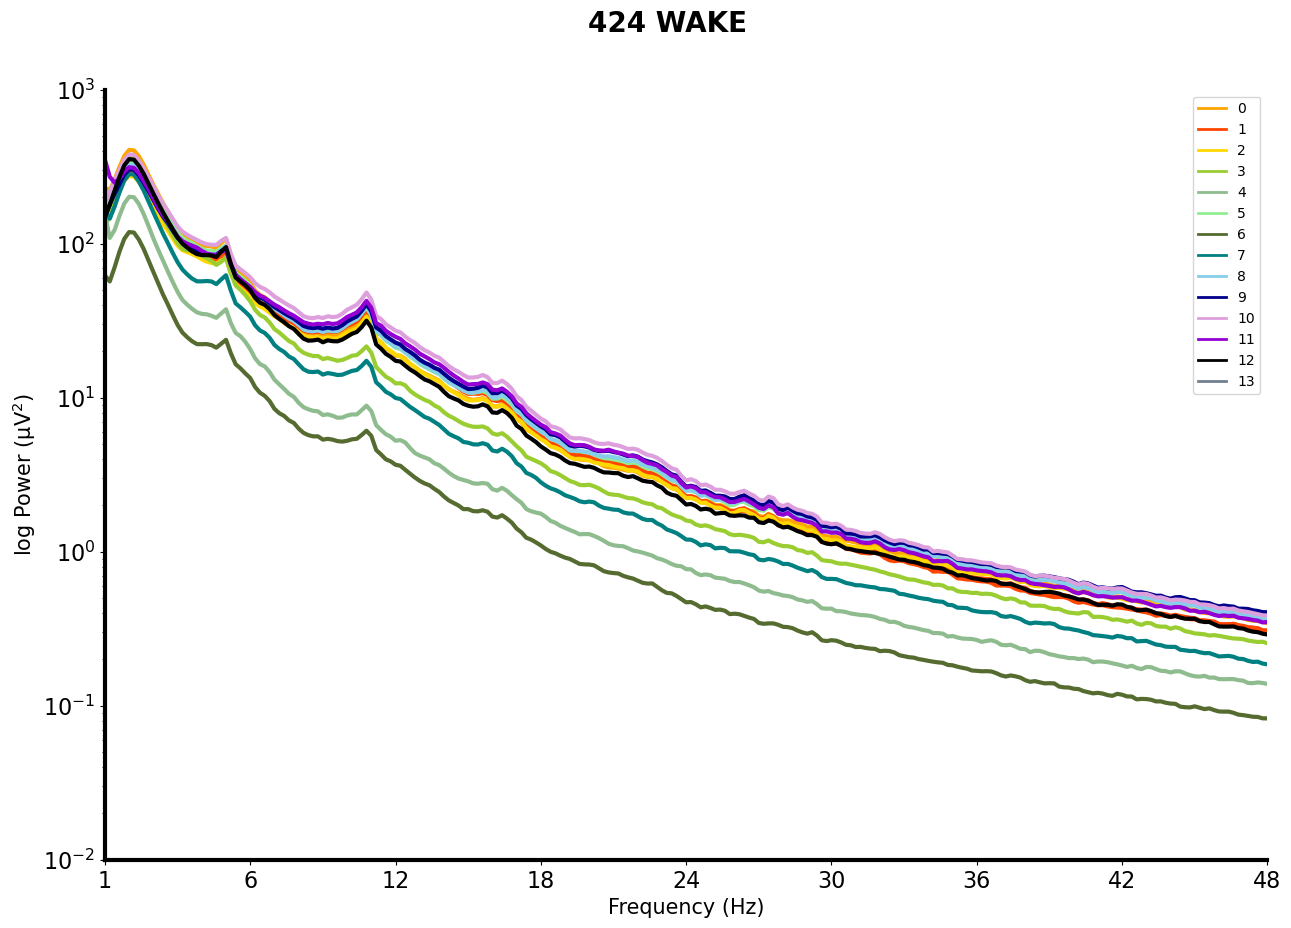

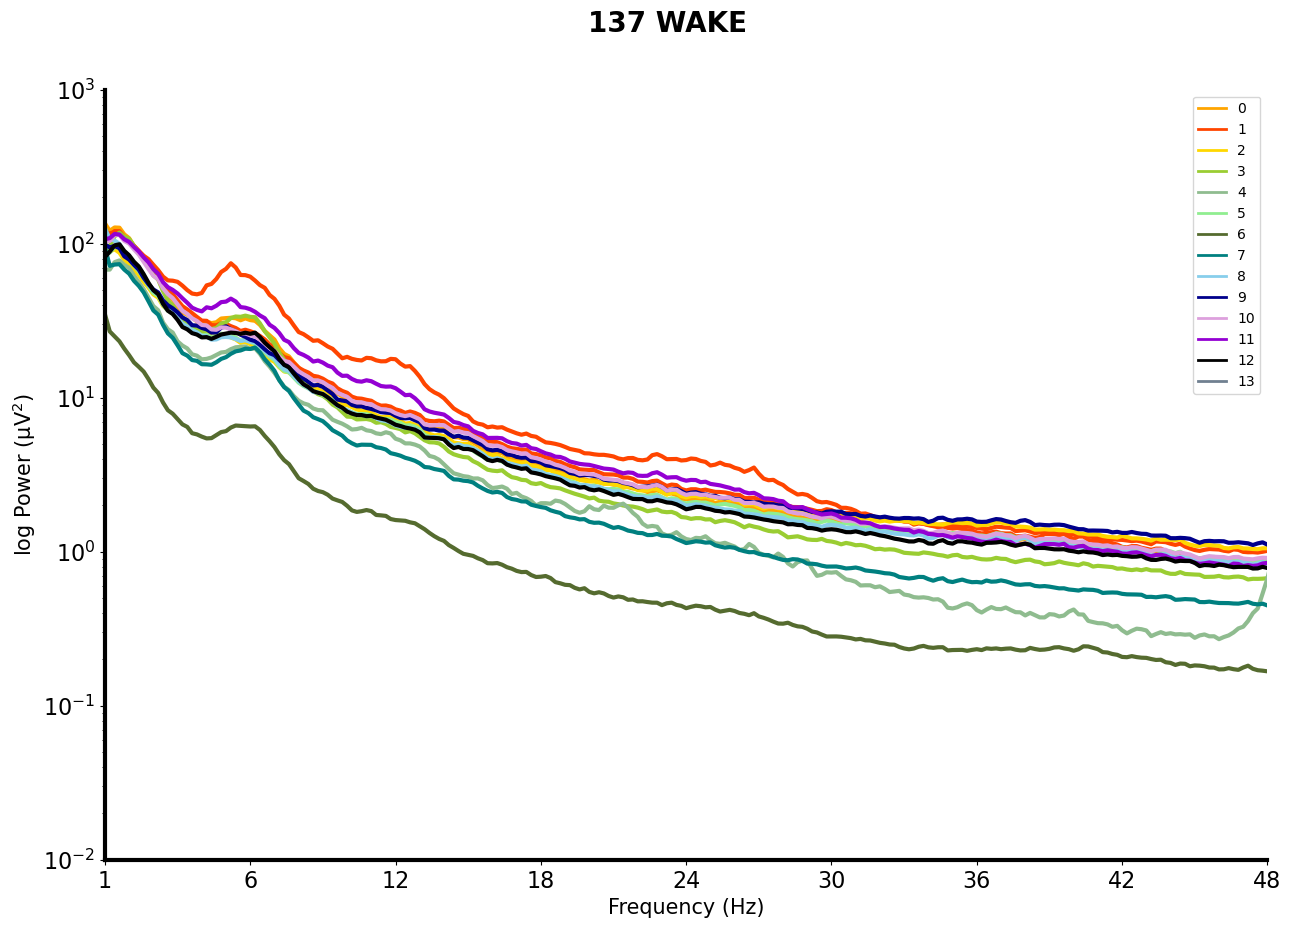

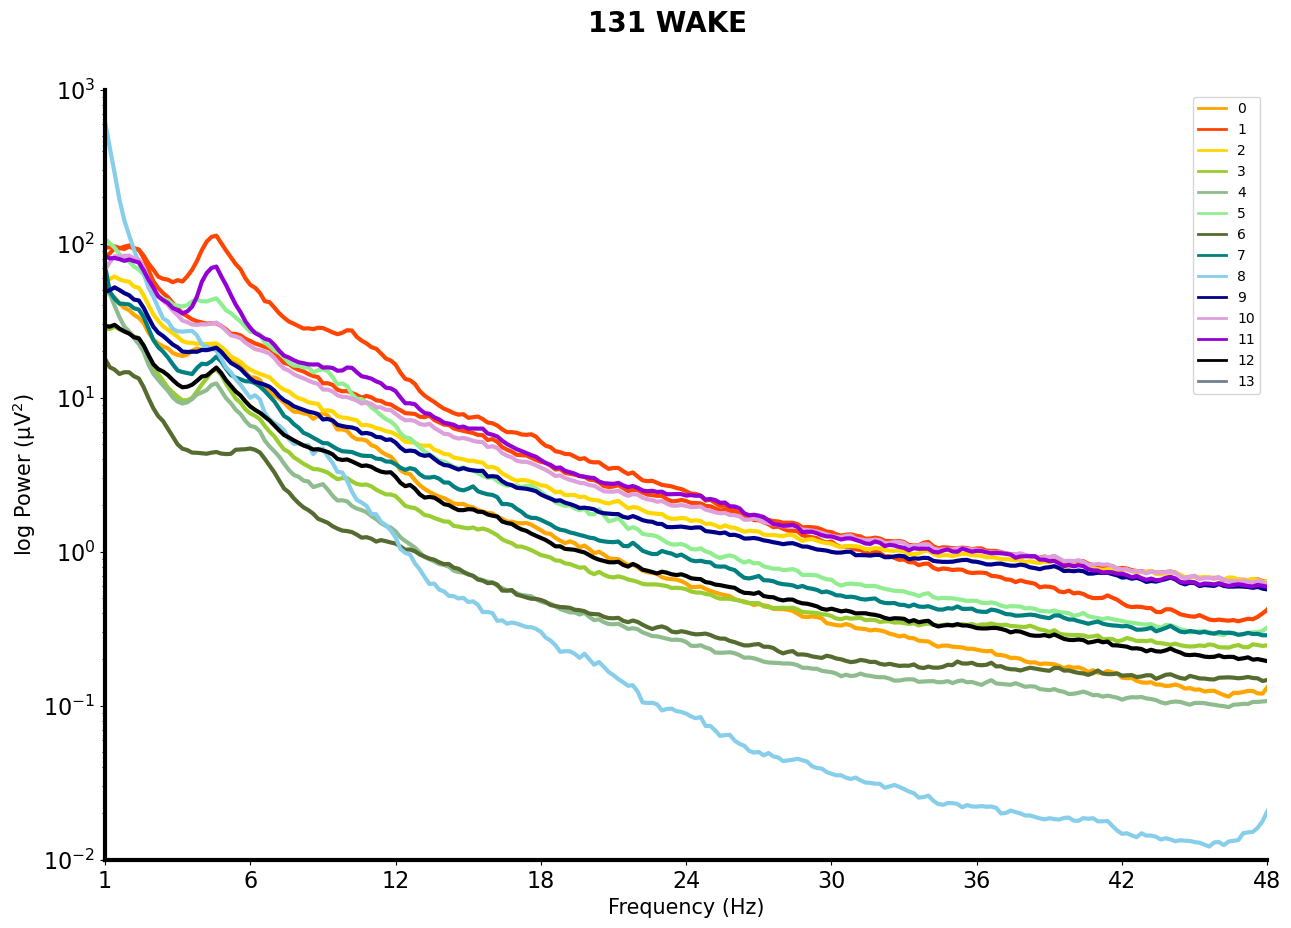

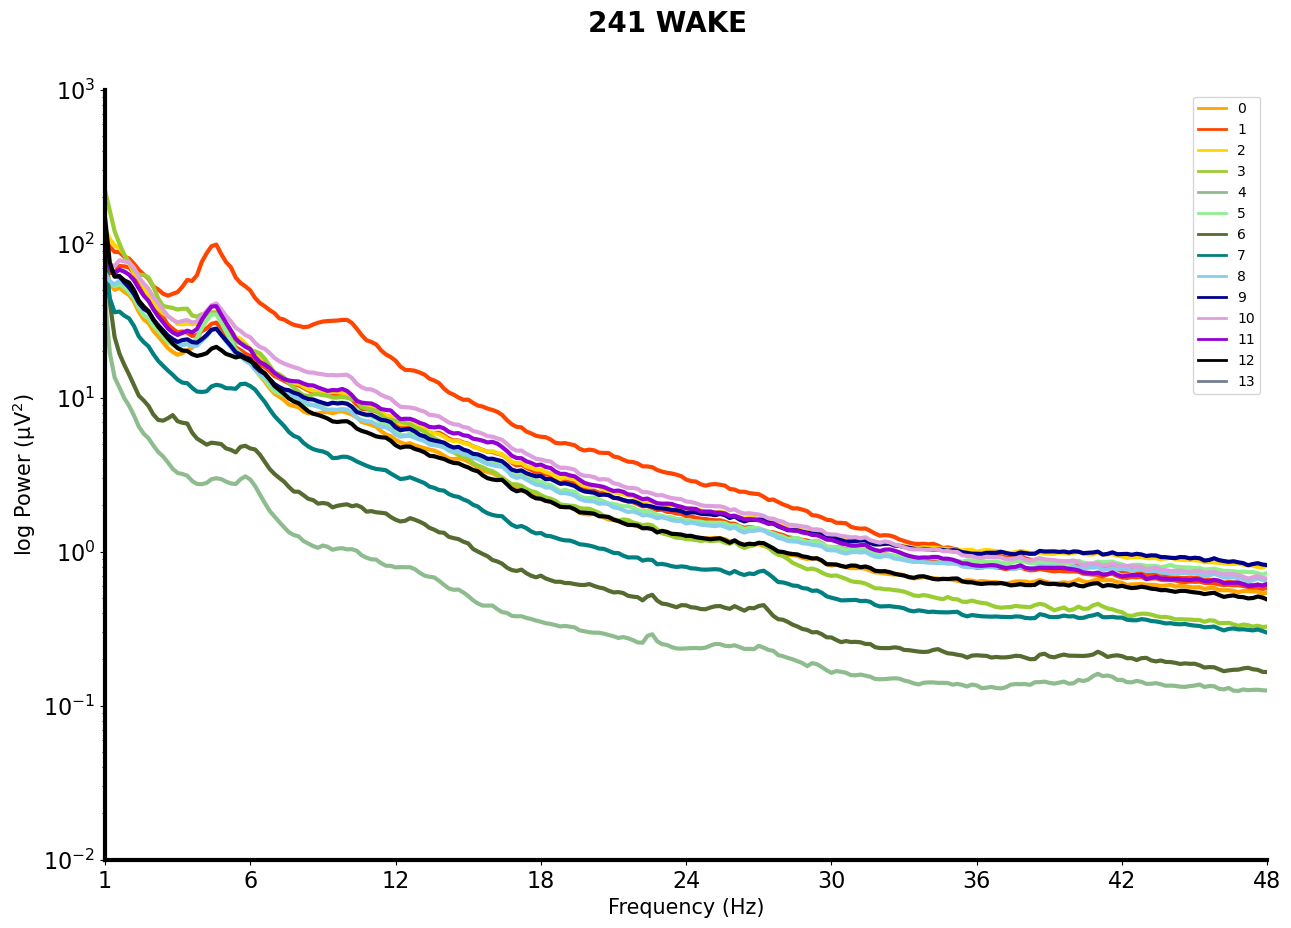

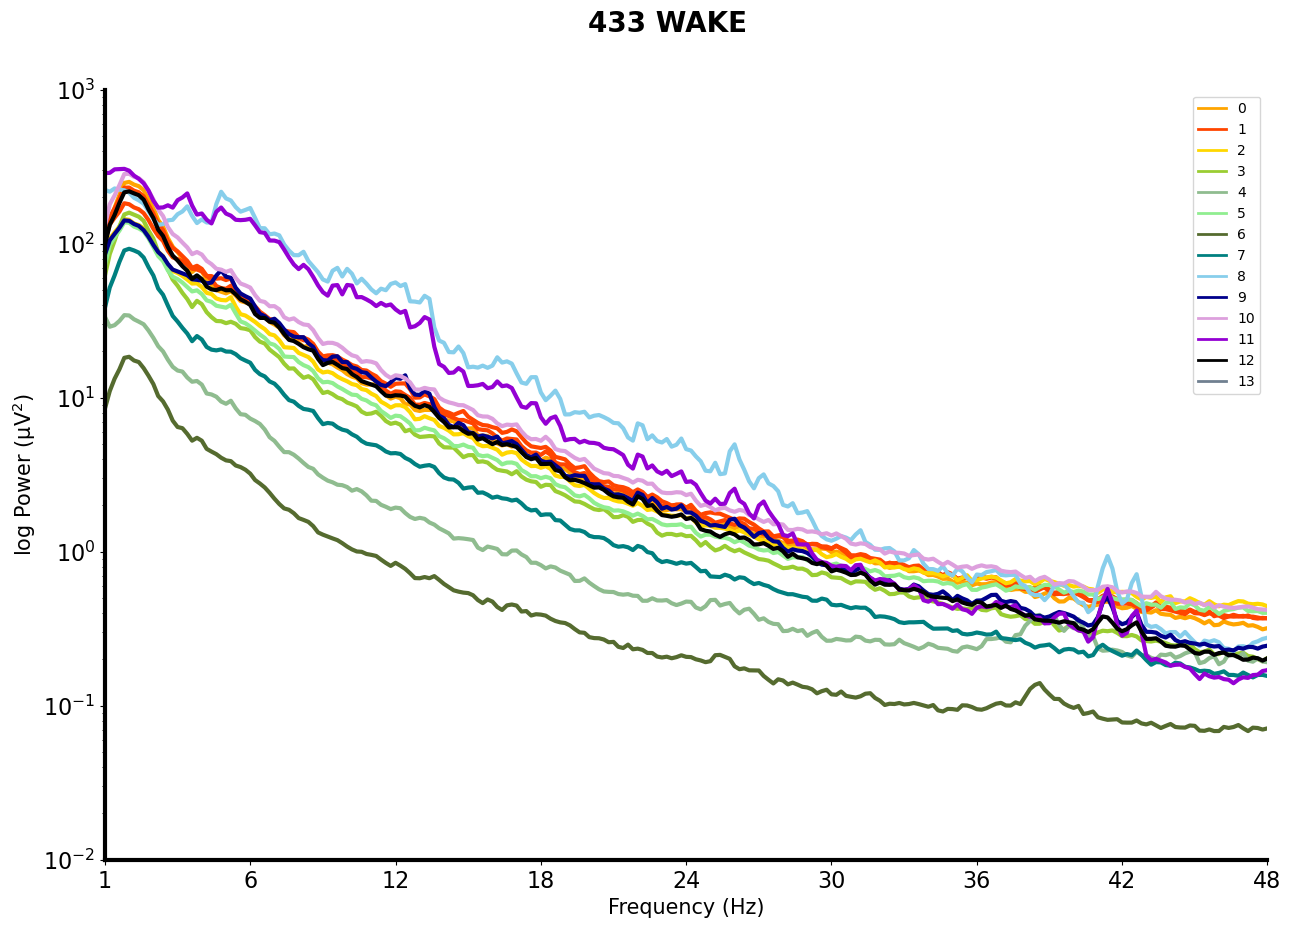

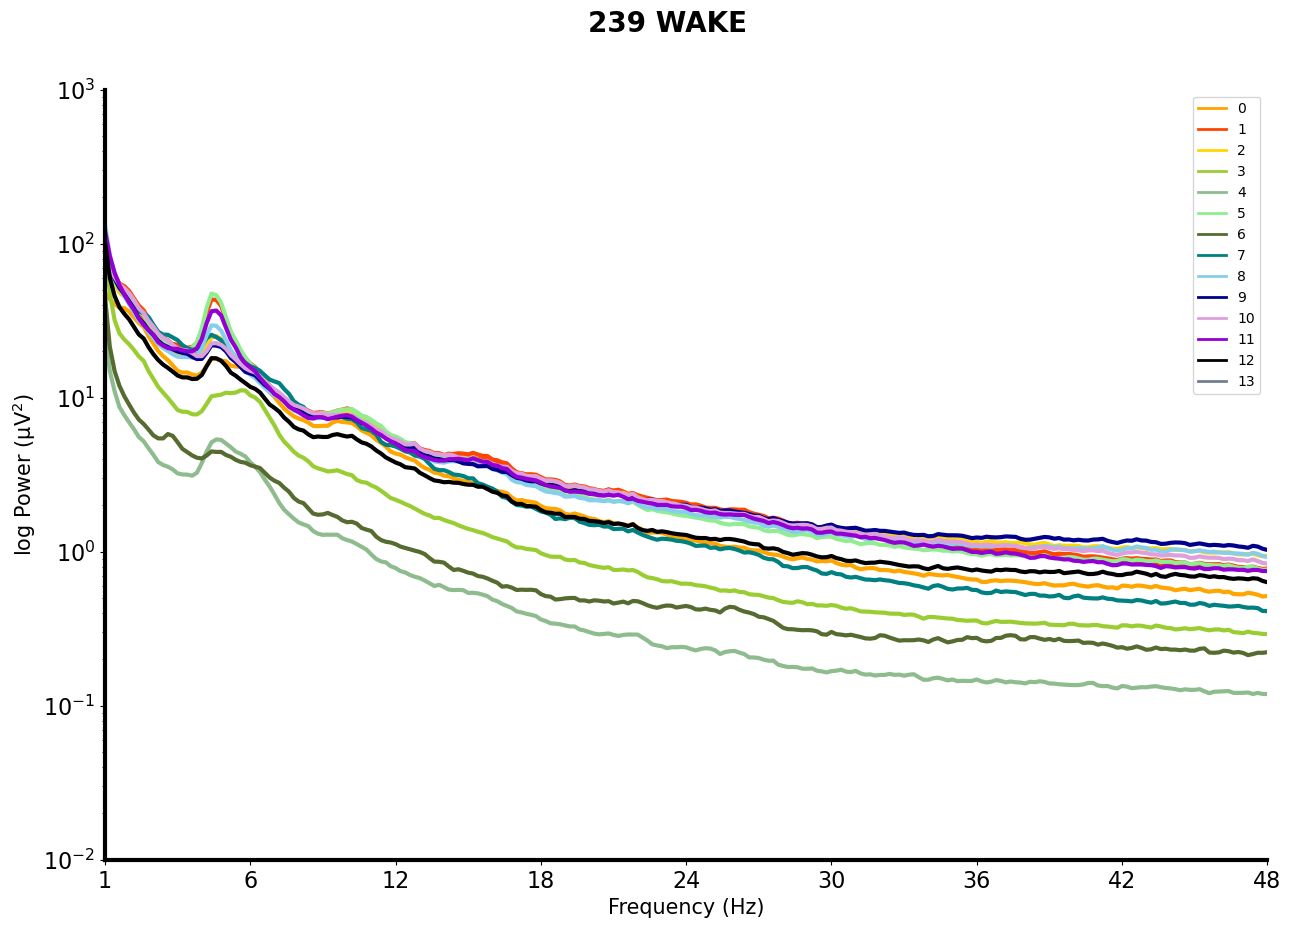

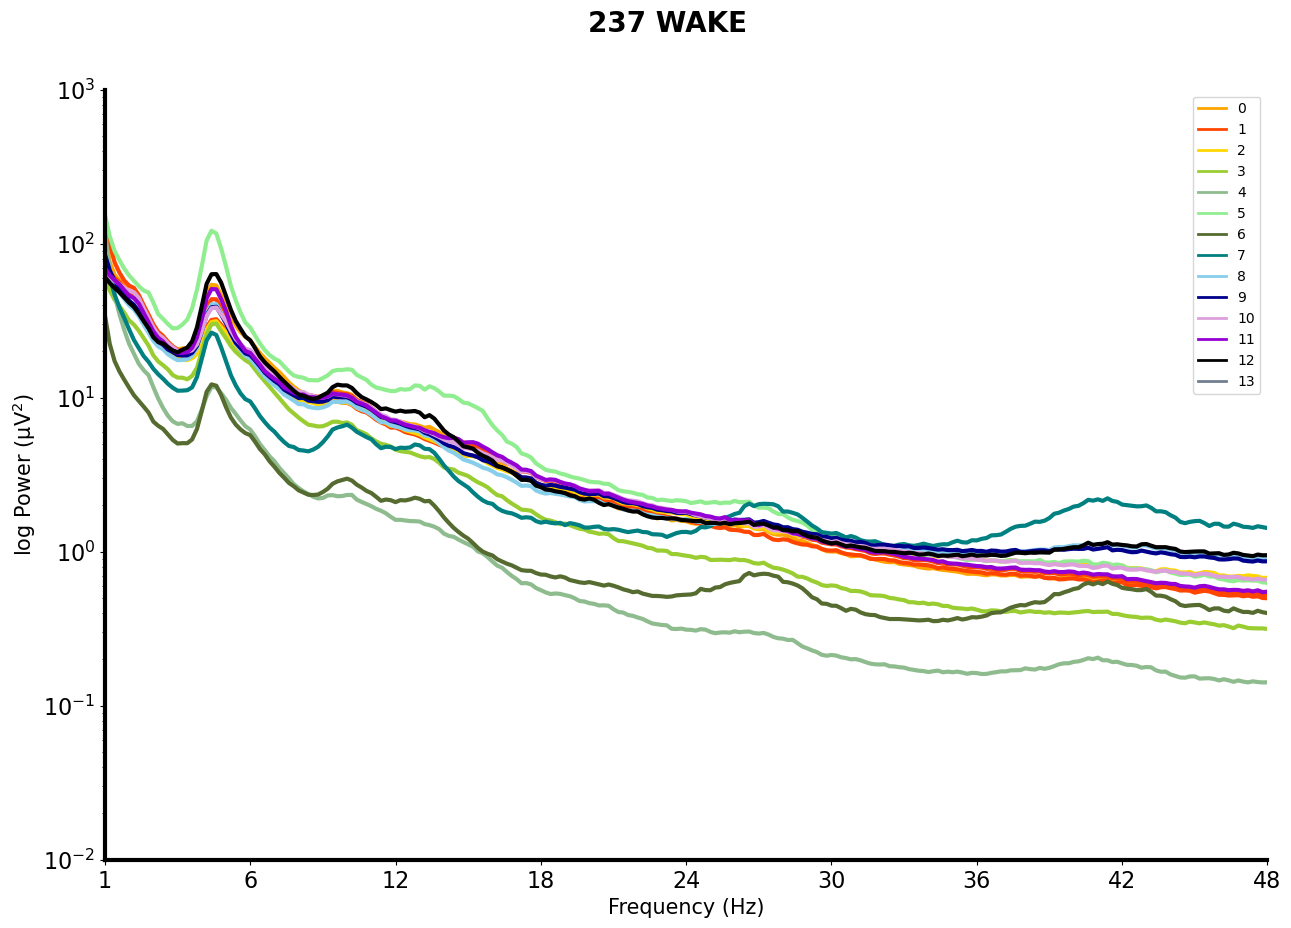

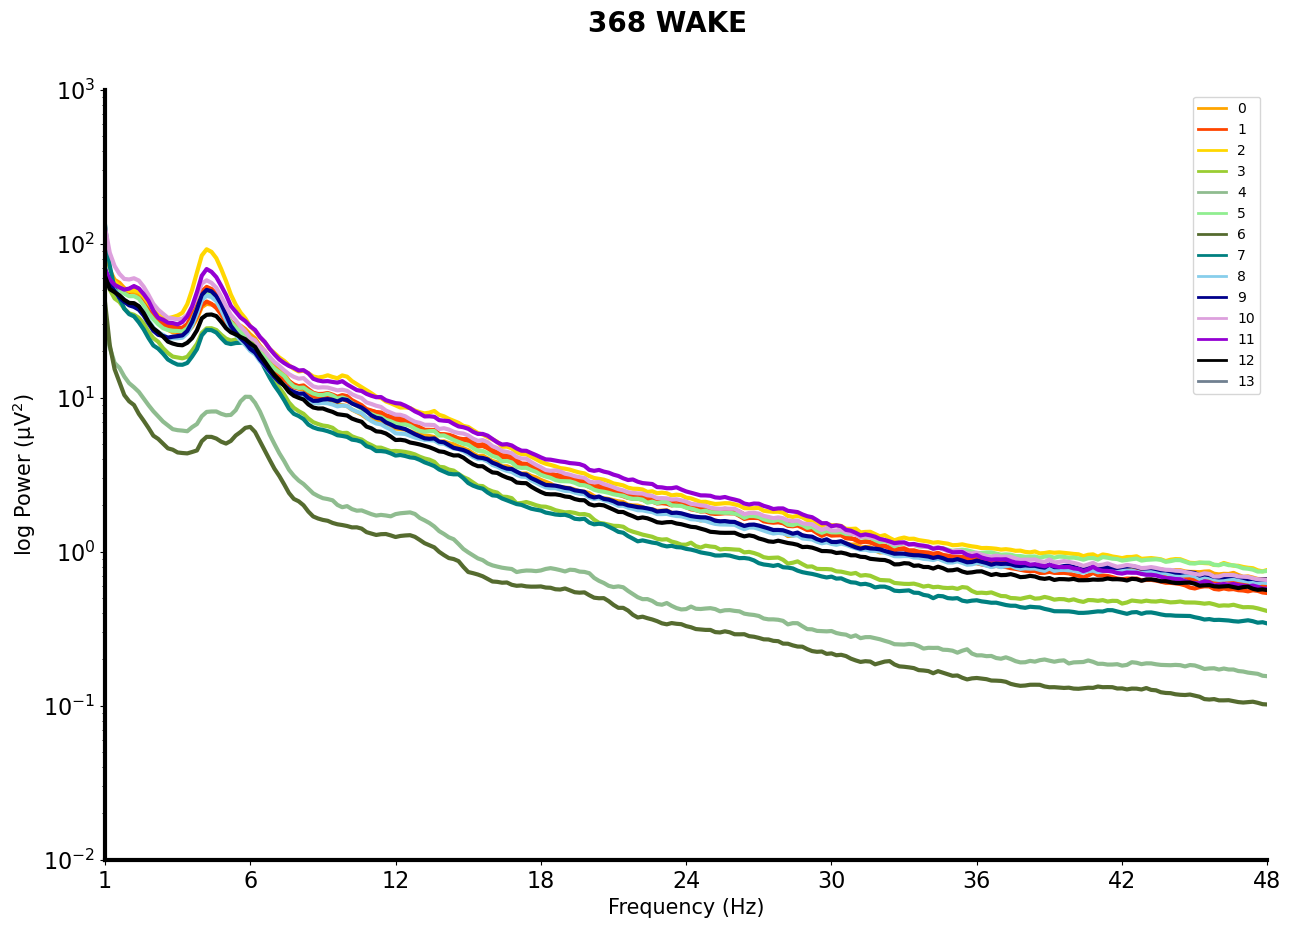

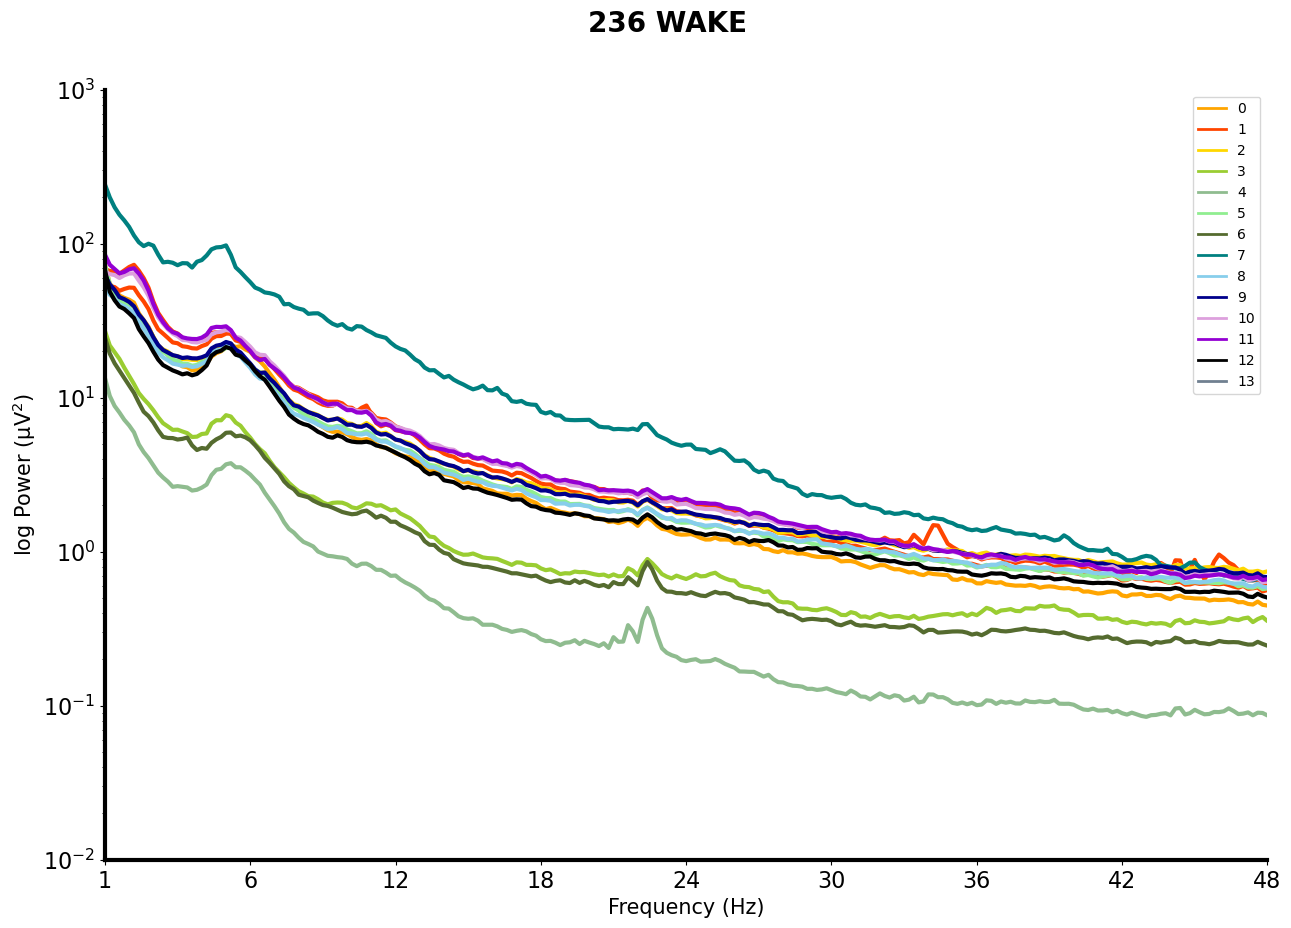

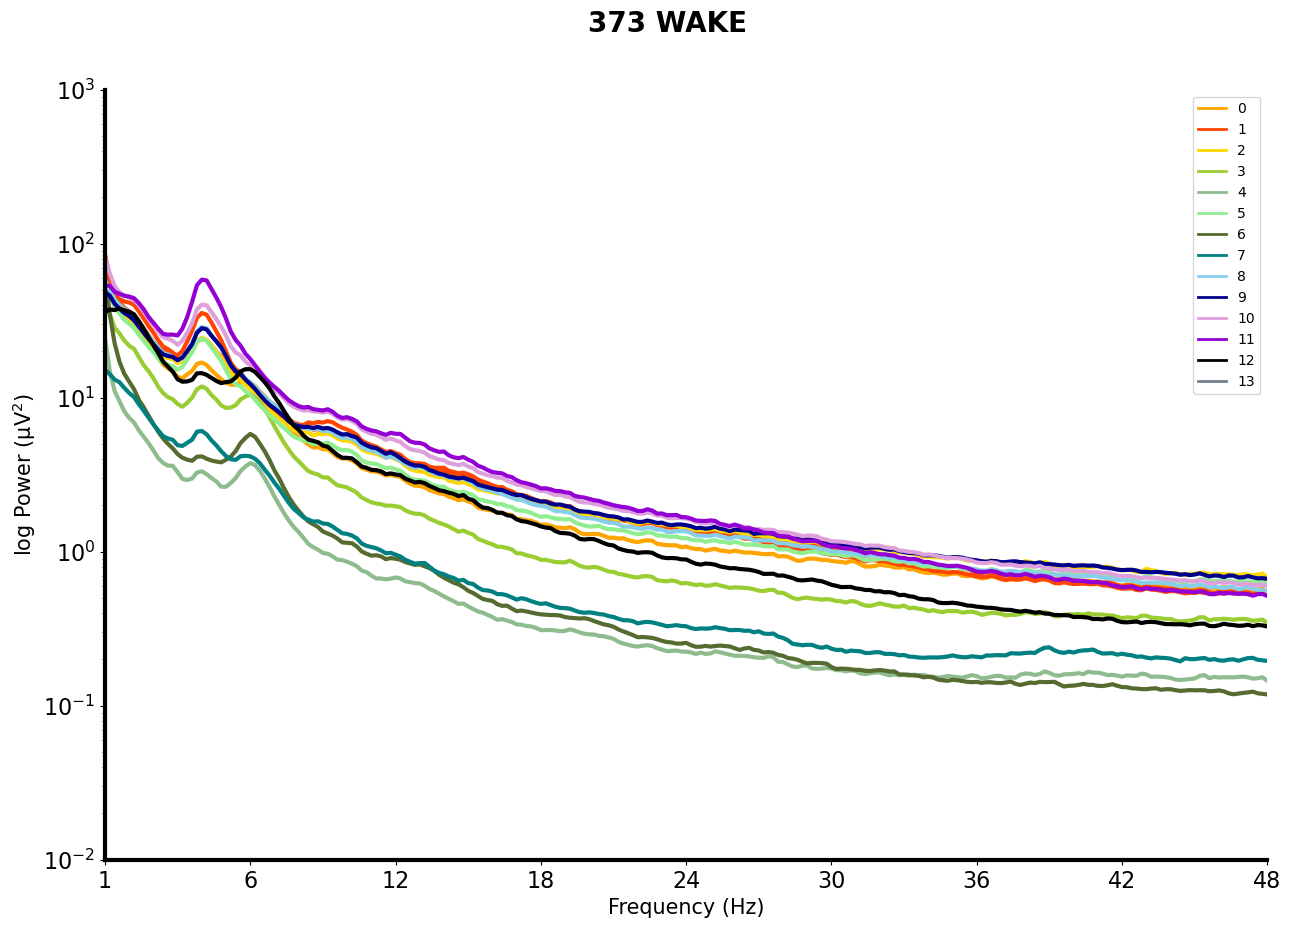

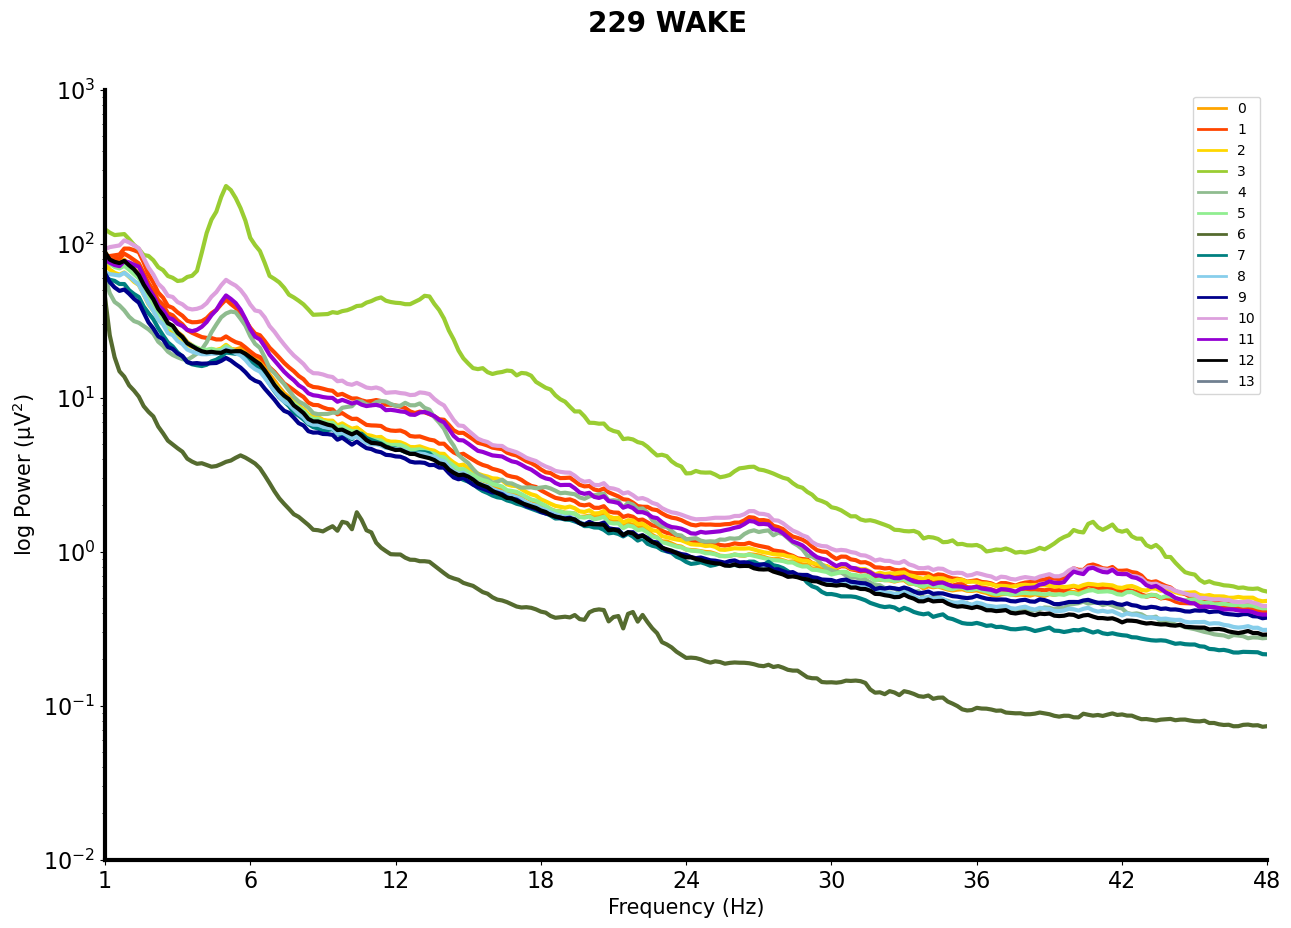

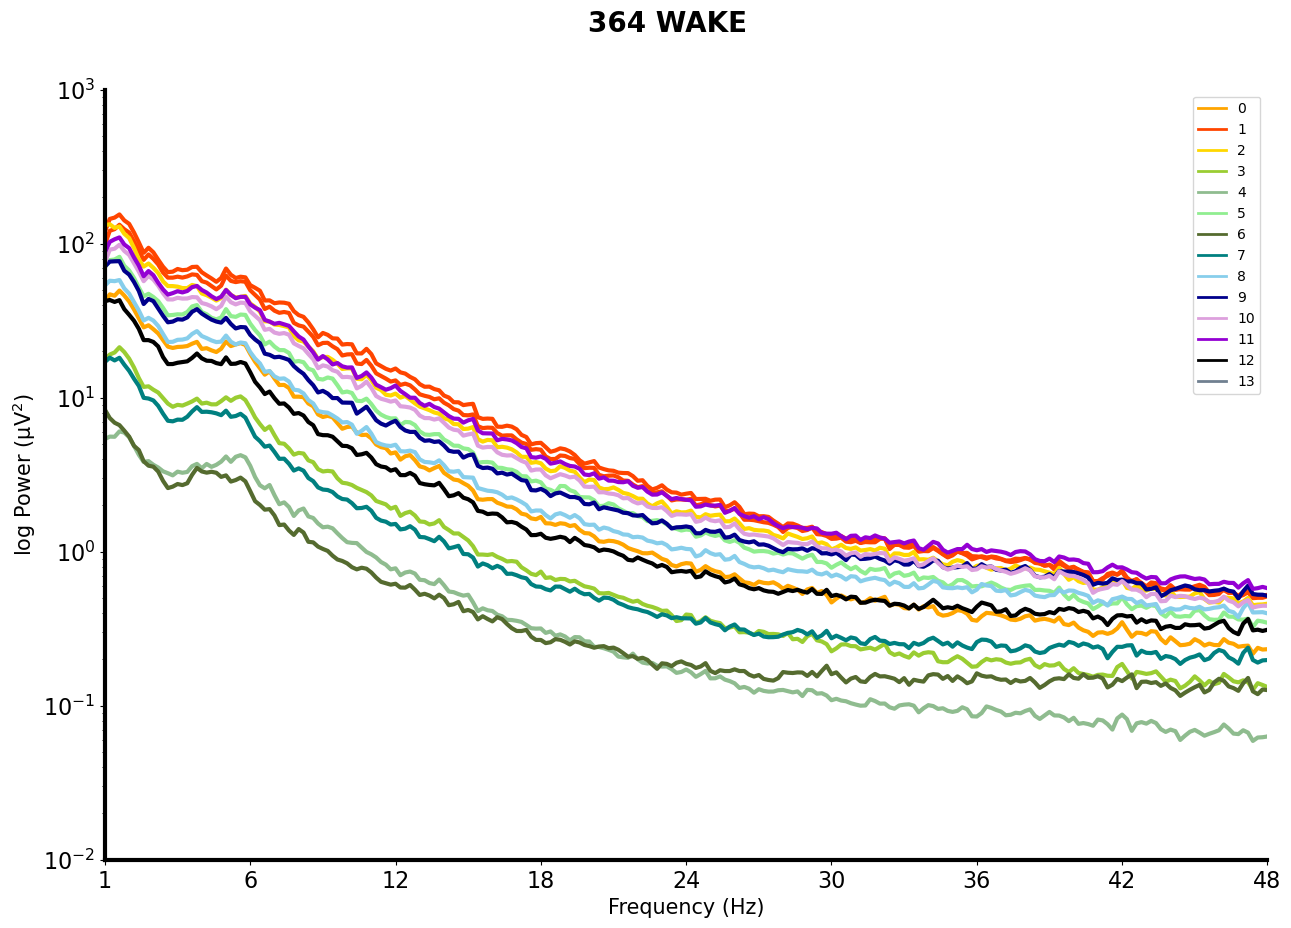

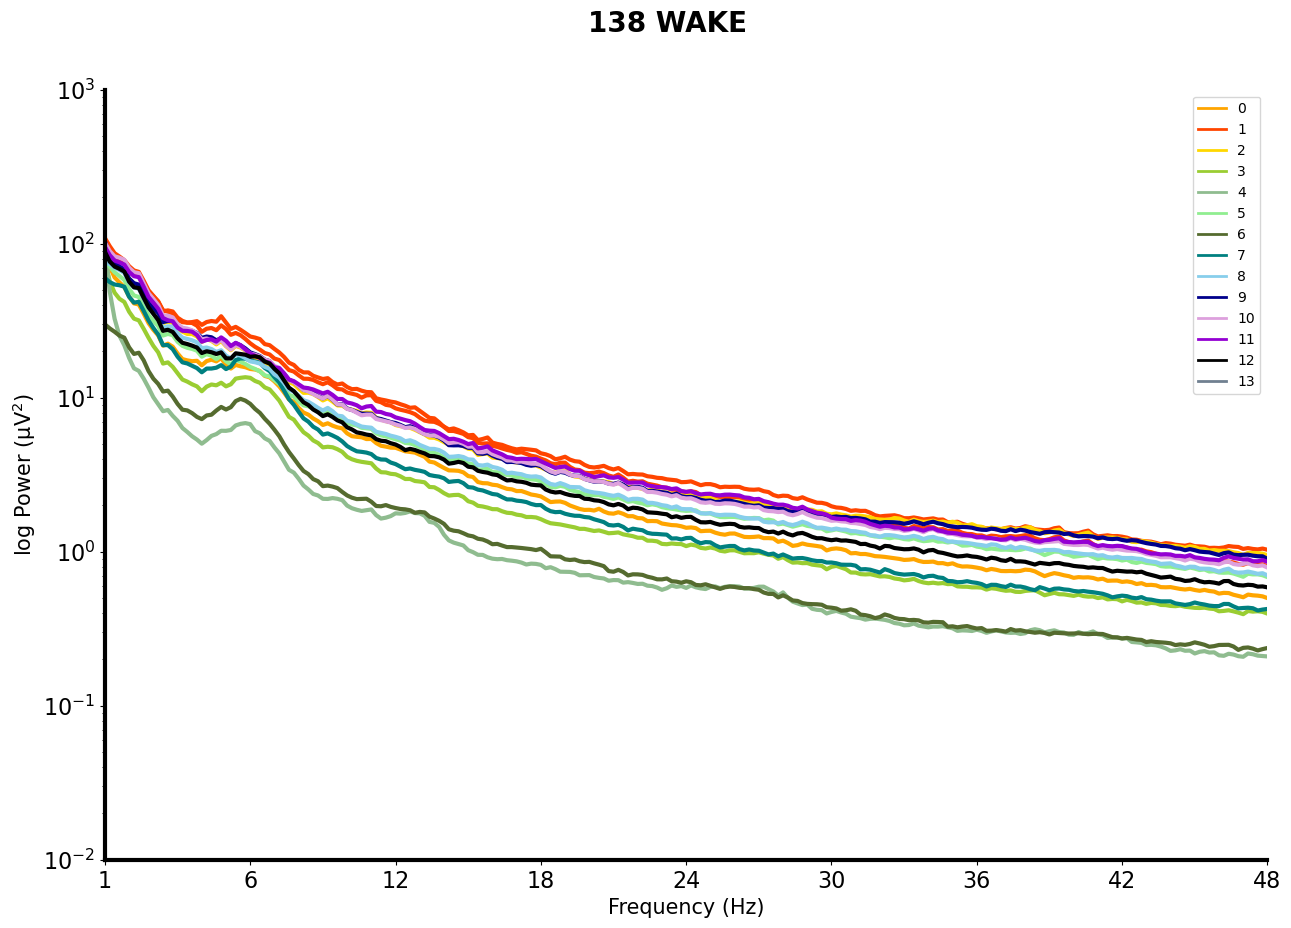

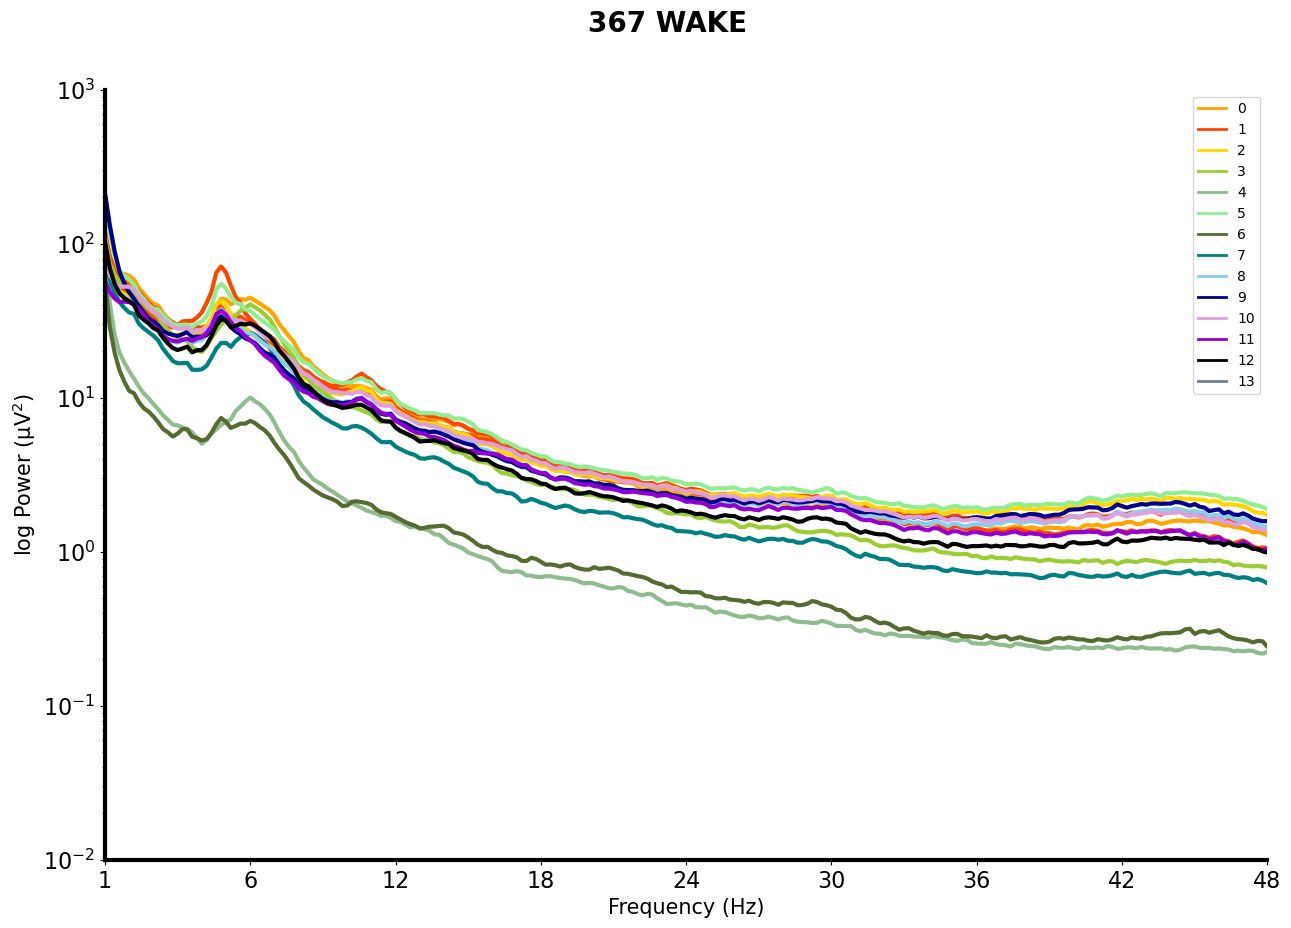

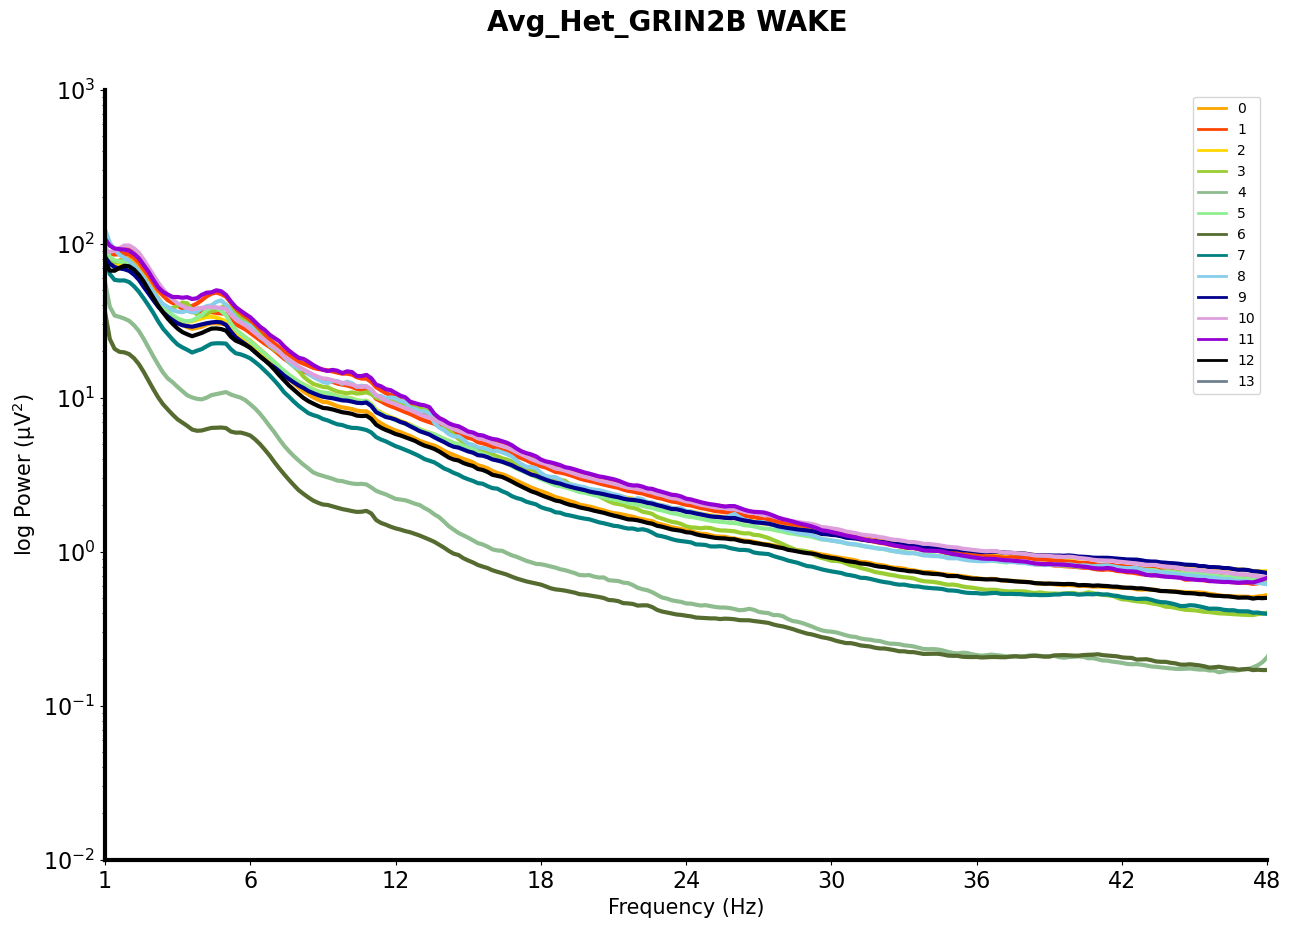

In [23]:
all_hets = []
average_df = []
total_epochs= []

for anim in id_list:
    print(anim)
    os.chdir('/home/melissa/RESULTS/GRIN2B/Entire_Power_Arrays/HET/' + sleepstage + '/')
    br_1 = np.load(str(anim) + '_power_BR_1.npy')
    br_2 = np.load(str(anim) + '_power_BR_2.npy')
    total_br = np.concatenate([br_1, br_2])
    numb_epochs = len(br_1) + len(br_2)
    per_animal_total = {'Animal_ID': str(anim), 'Total Epochs': [numb_epochs]}
    total_epochs.append(pd.DataFrame(data = per_animal_total))
    avg_array = average_power_arrays(total_br)
    all_hets.append(avg_array)
    np.save('/home/melissa/RESULTS/GRIN2B/Entire_Power_Arrays/AVERAGE/' + sleepstage + '/HET/' + str(anim) + '_avg_array.npy', avg_array)
    plot_animals_by_channels(anim, avg_array, channel_list, plot_colors, sleepstage = sleepstage, save_directory = save_directory)

avg_het = np.mean(np.array(all_hets), axis = 0)
save_directory_avg = '/home/melissa/RESULTS/GRIN2B/Entire_Power_Arrays/PLOTS/' + sleepstage + '/'
plot_animals_by_channels('Avg_Het_GRIN2B', avg_het, channel_list, plot_colors, sleepstage = sleepstage, save_directory = save_directory_avg)
np.save(save_directory_avg + 'avg_het_power_ ' + sleepstage + '.npy', avg_het)

In [11]:
total_epochs_per_animal = pd.concat(total_epochs)
print(total_epochs_per_animal)
os.chdir('/home/melissa/RESULTS/GRIN2B/Entire_Power_Arrays/PLOTS/' + sleepstage)
total_epochs_per_animal.to_csv('total_epochs_per_animal_het.csv')

  Animal_ID  Total Epochs
0       241          1105
0       433           795
0       139           840
0       227          1430
0       237          1025
0       373           894
0       138           918
0       130          1179
0       131          1434
0       424           985
0       129           347
0       239          1211
0       368          1406
0       229          1173
0       228           956
0       137           590
0       364           364
0       367           717
0       236           659


# WT Analysis 

In [7]:
sleepstage = 'WAKE'

In [8]:
file_list = os.listdir('/home/melissa/RESULTS/GRIN2B/Entire_Power_Arrays/WT/' + sleepstage + '/')
os.chdir('/home/melissa/RESULTS/GRIN2B/Entire_Power_Arrays/WT/' + sleepstage + '/')
anim_id_list = []
for file in file_list:
    anim_id = file[0:3]
    anim_id_list.append(anim_id)

In [10]:
id_list = list(set(anim_id_list))
#id_list.remove('.ip')

In [11]:
channel_list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
plot_colors = ['orange', 'orangered', 'orangered', 'gold','yellowgreen','darkseagreen','lightgreen','darkolivegreen',
         'teal', 'skyblue', 'darkblue',  'plum', 'darkviolet', 'black', 'slategrey', 'slategrey', 'silver']
save_directory = '/home/melissa/RESULTS/GRIN2B/Entire_Power_Arrays/PLOTS/' + sleepstage + '/WT/'

365
401
375
362
132
238
383
140
404
240
430
382
378
371
366
402
369
363


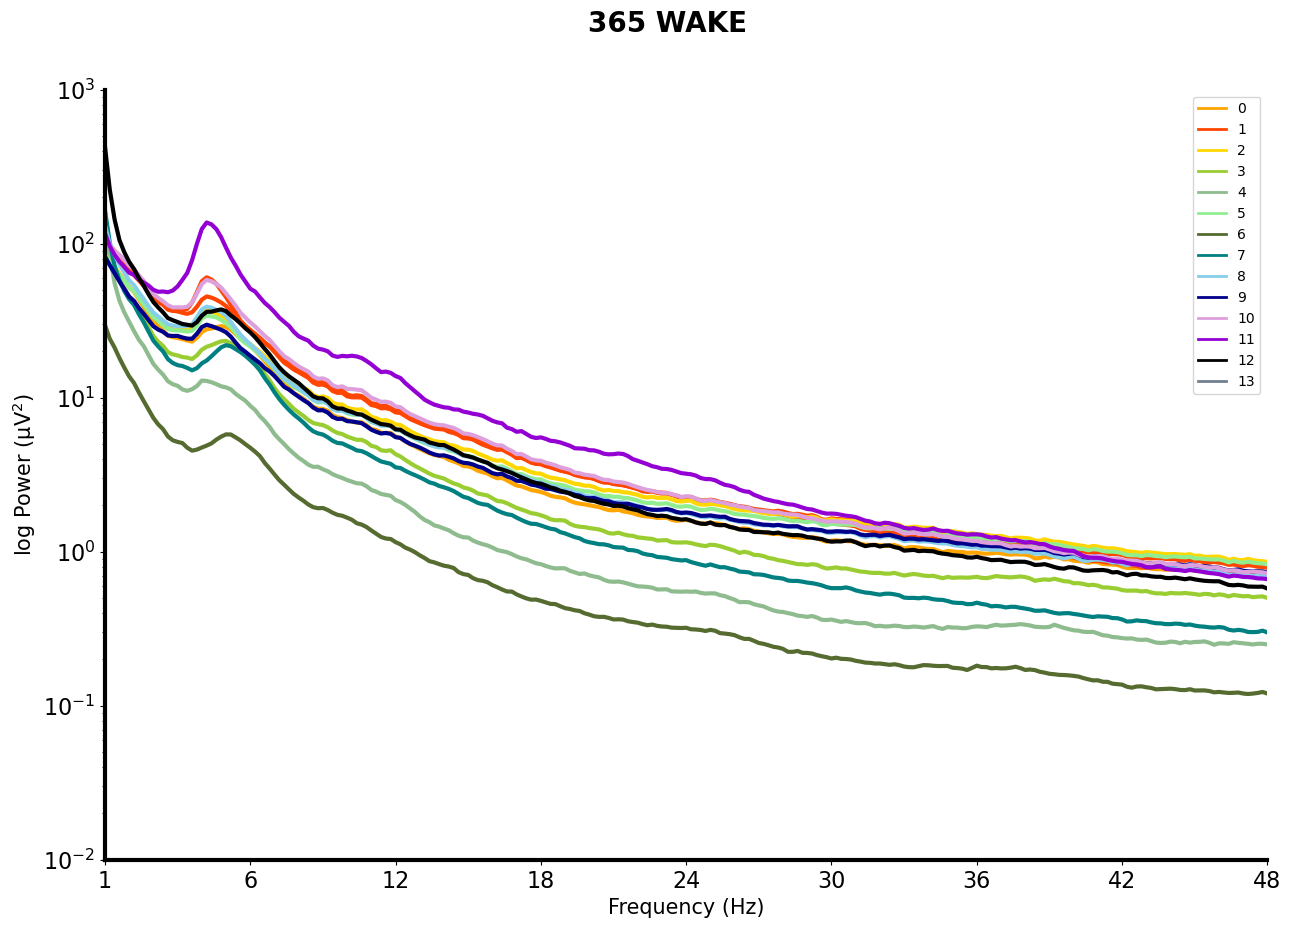

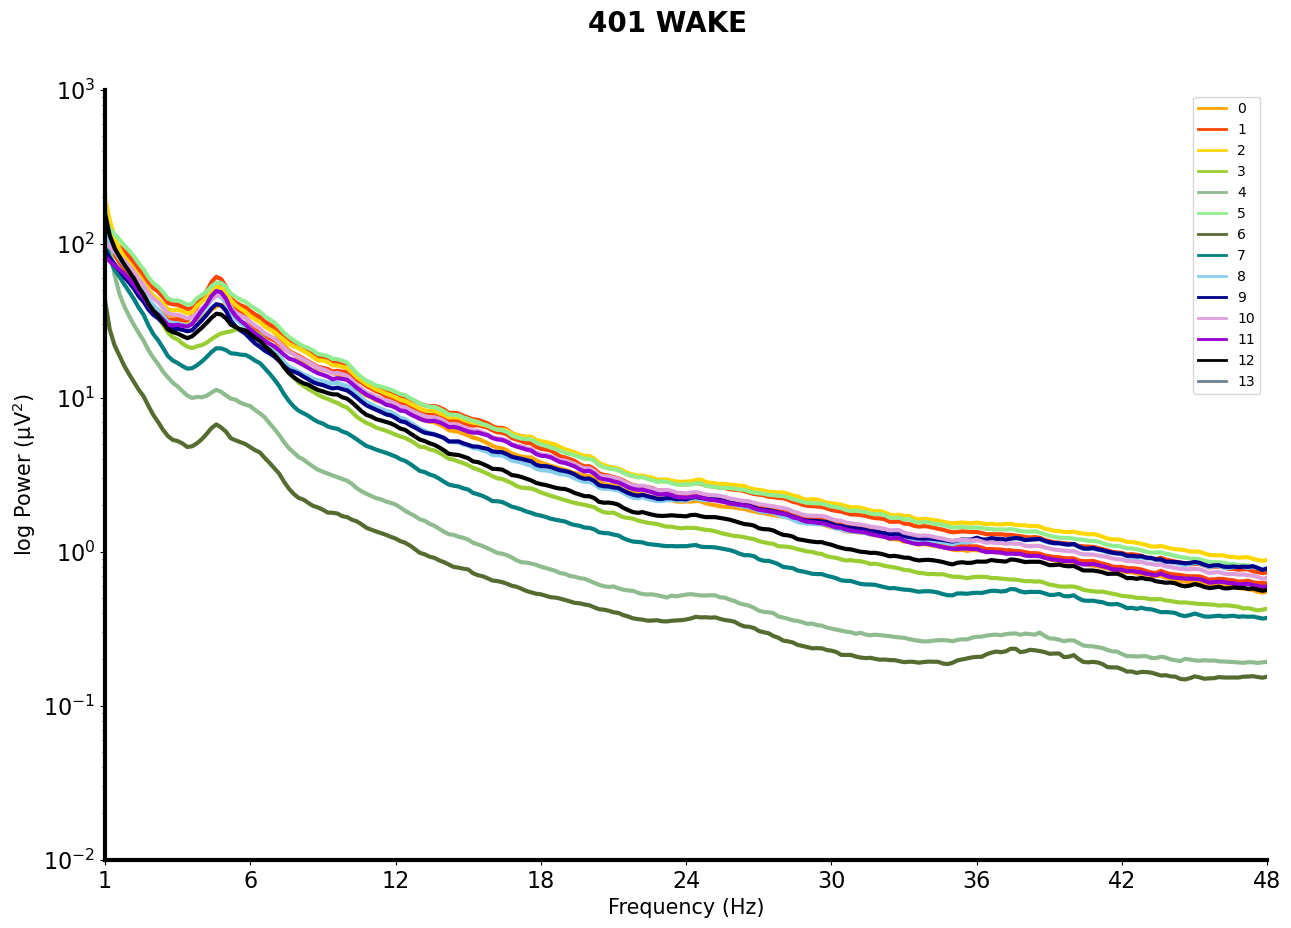

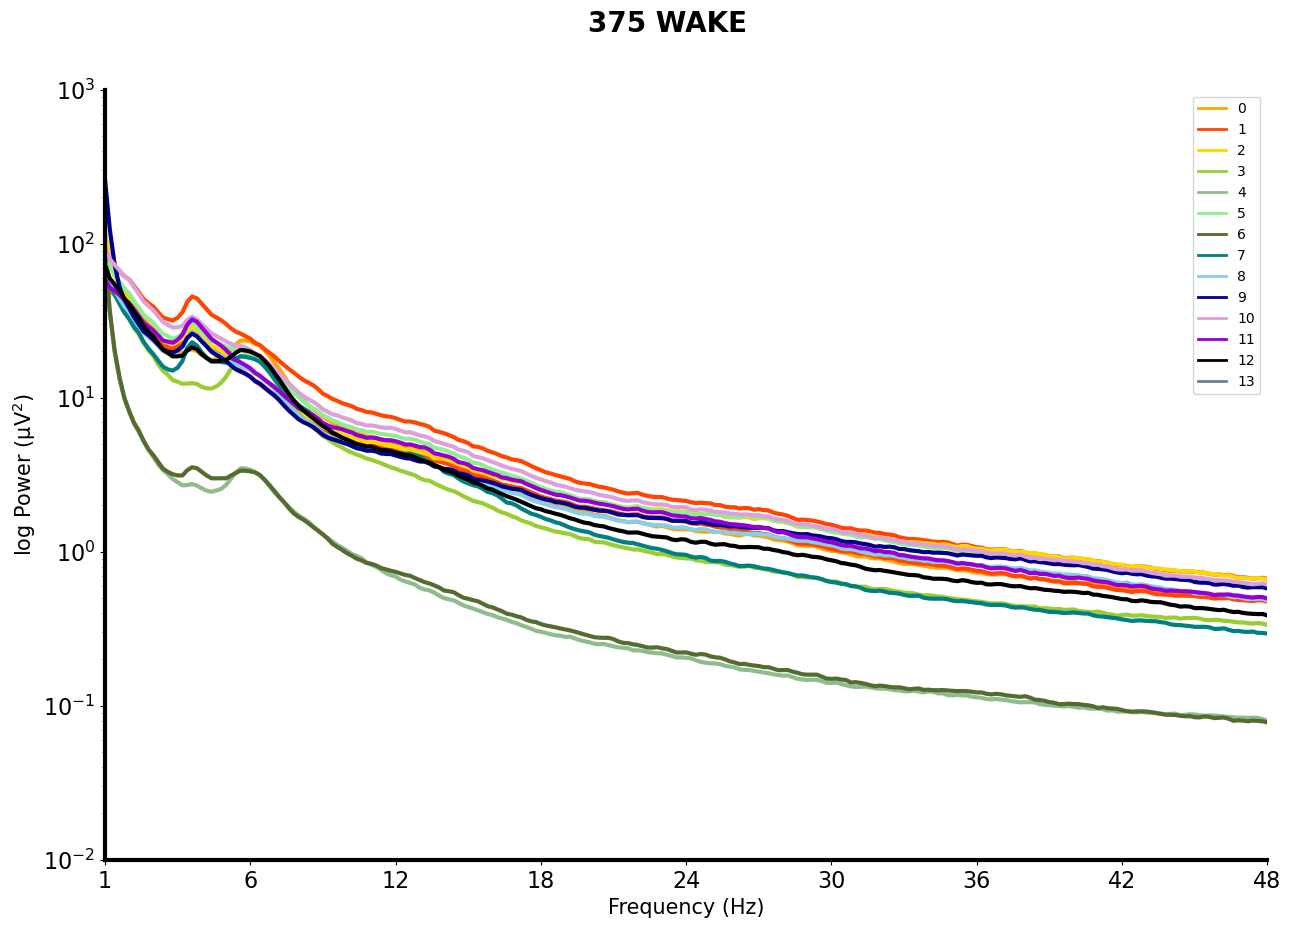

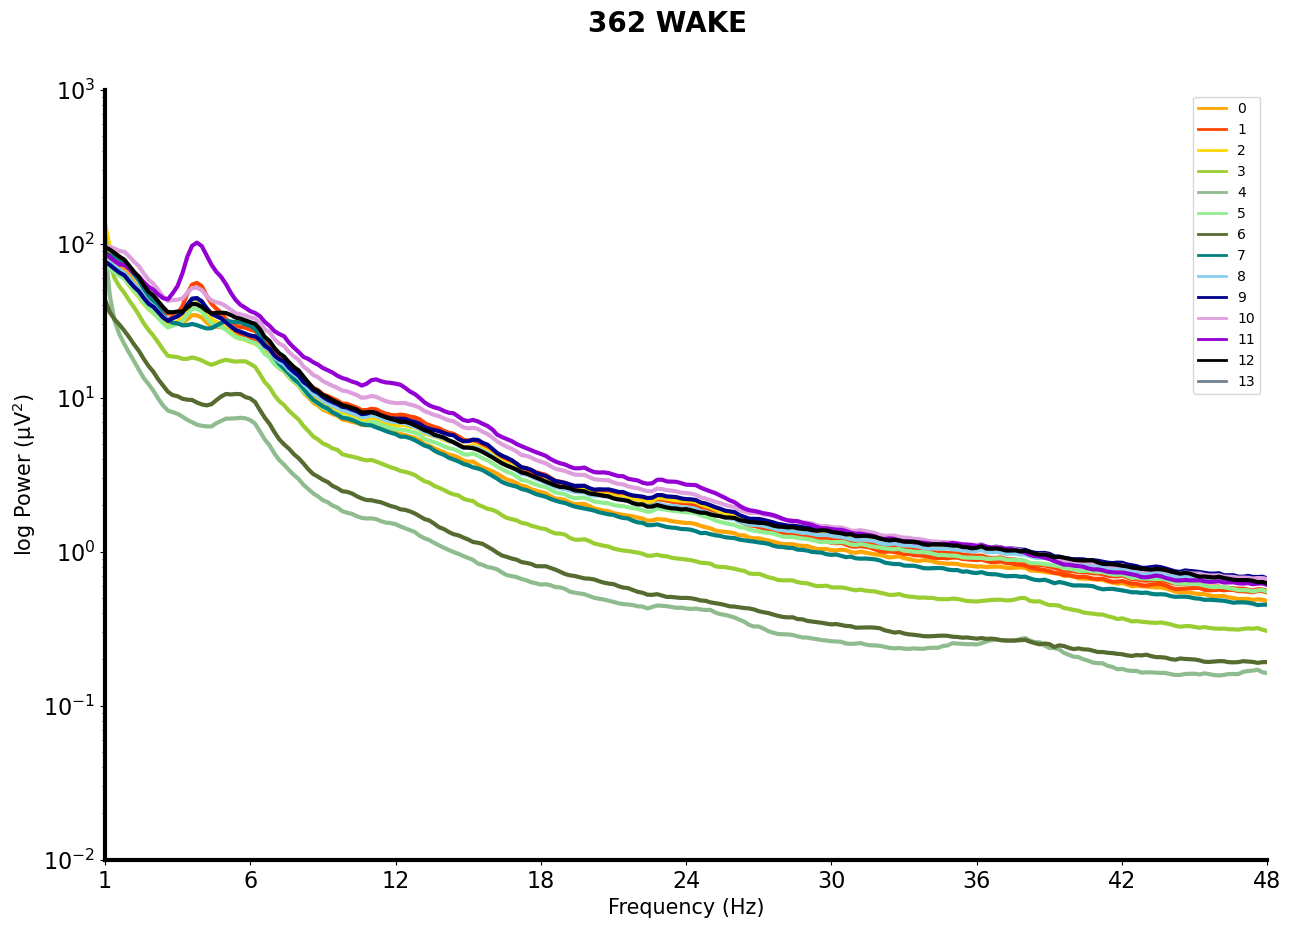

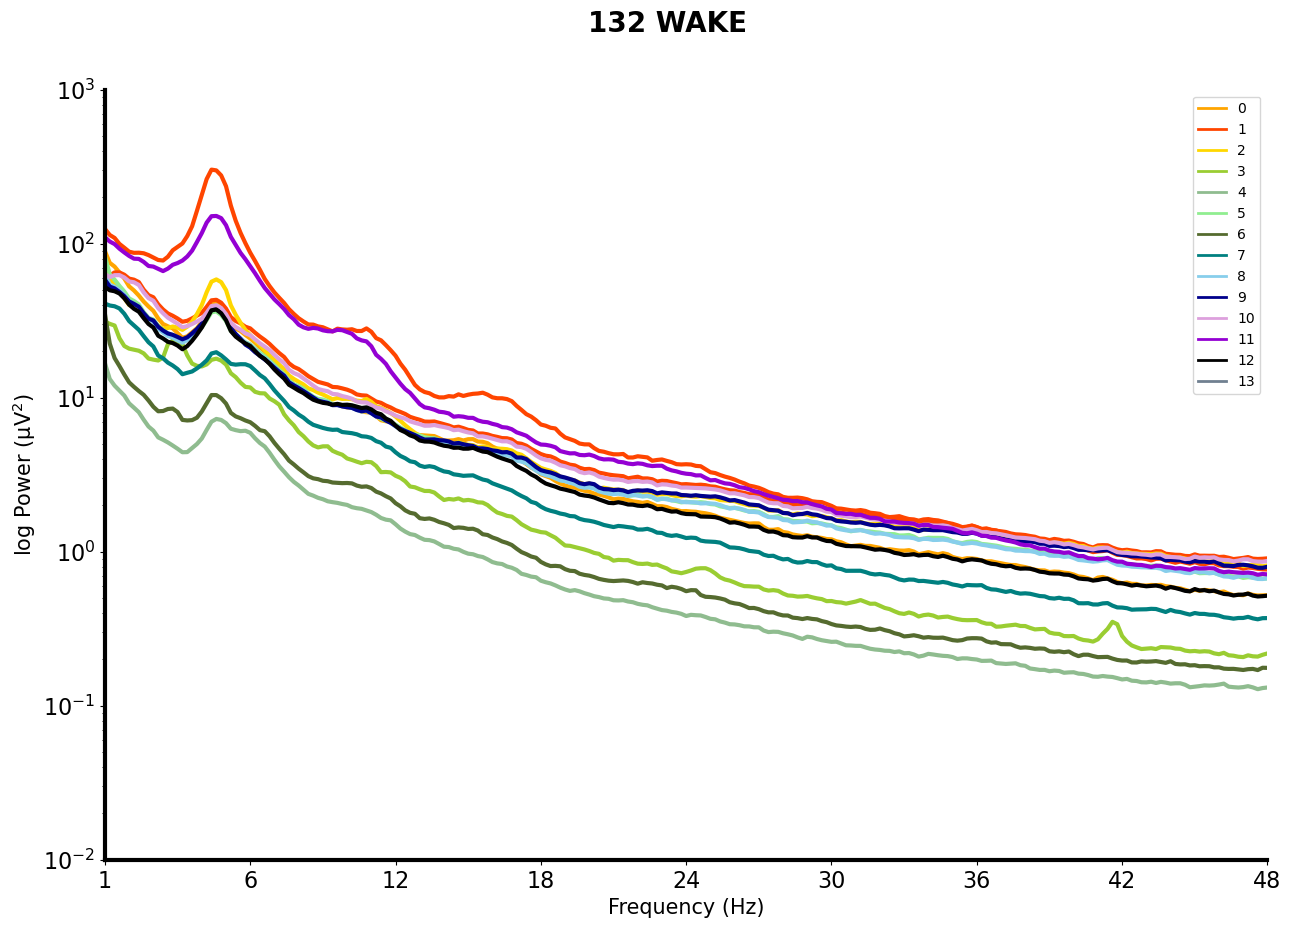

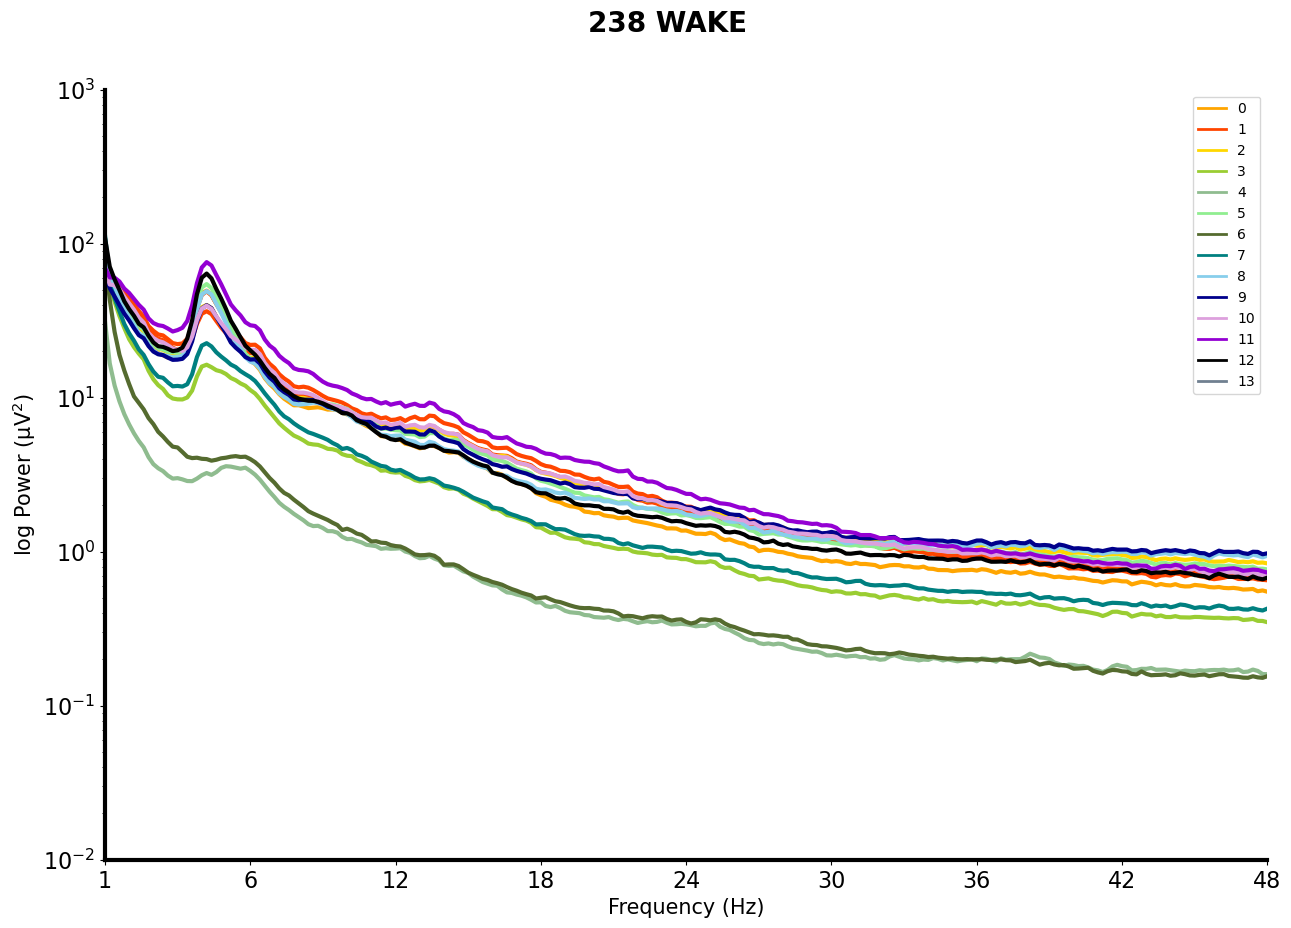

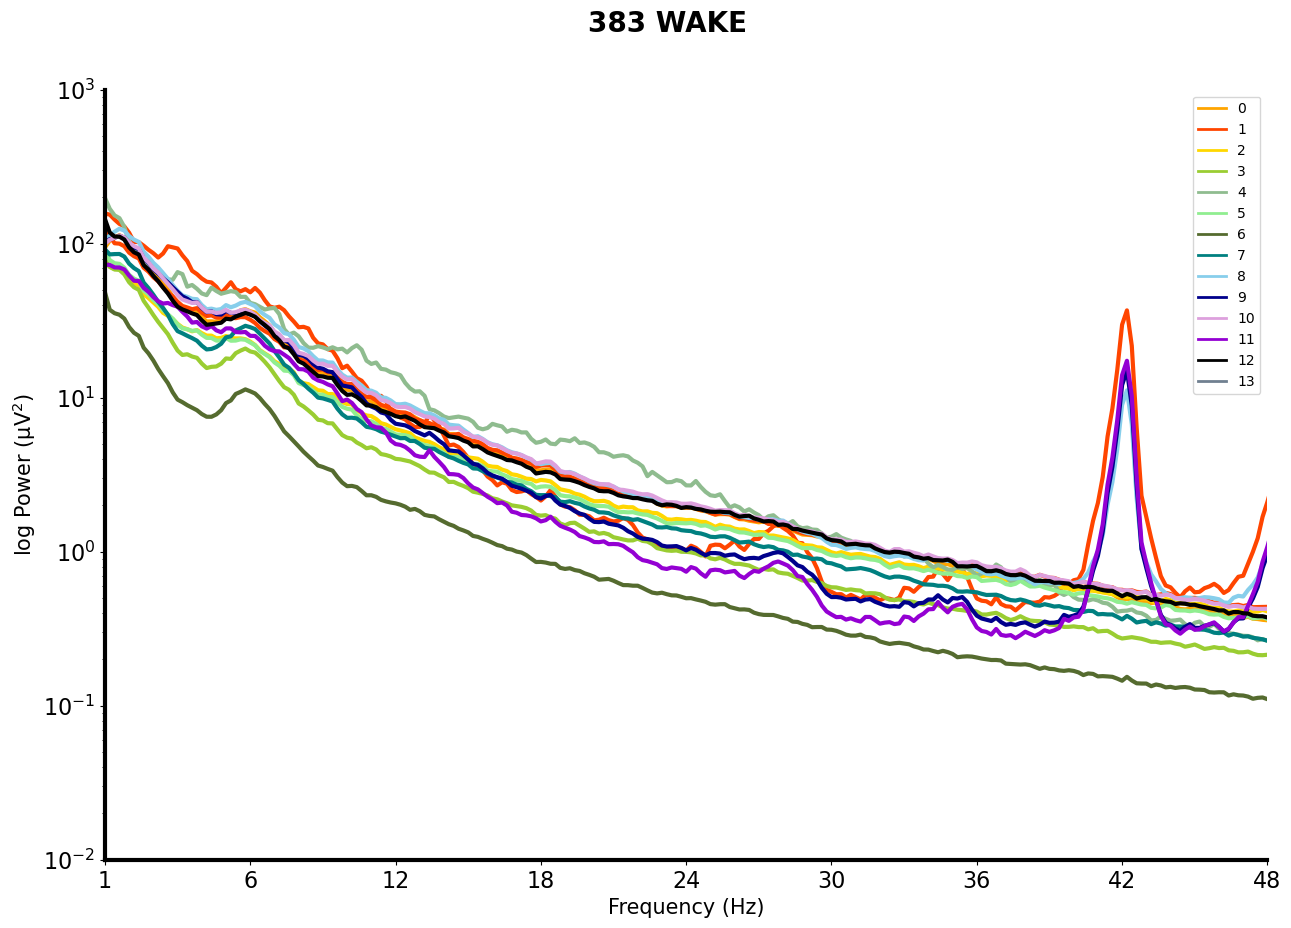

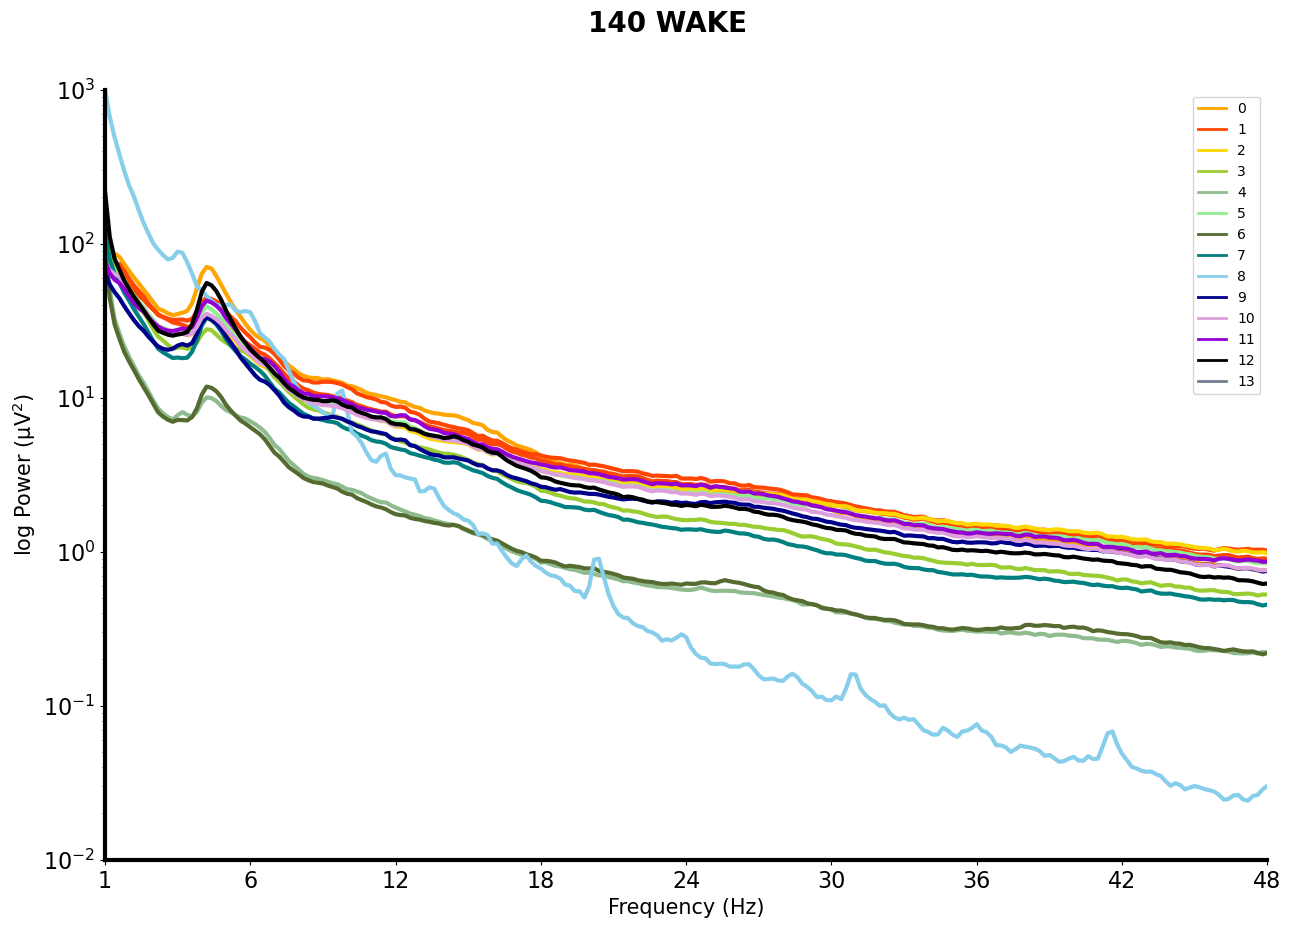

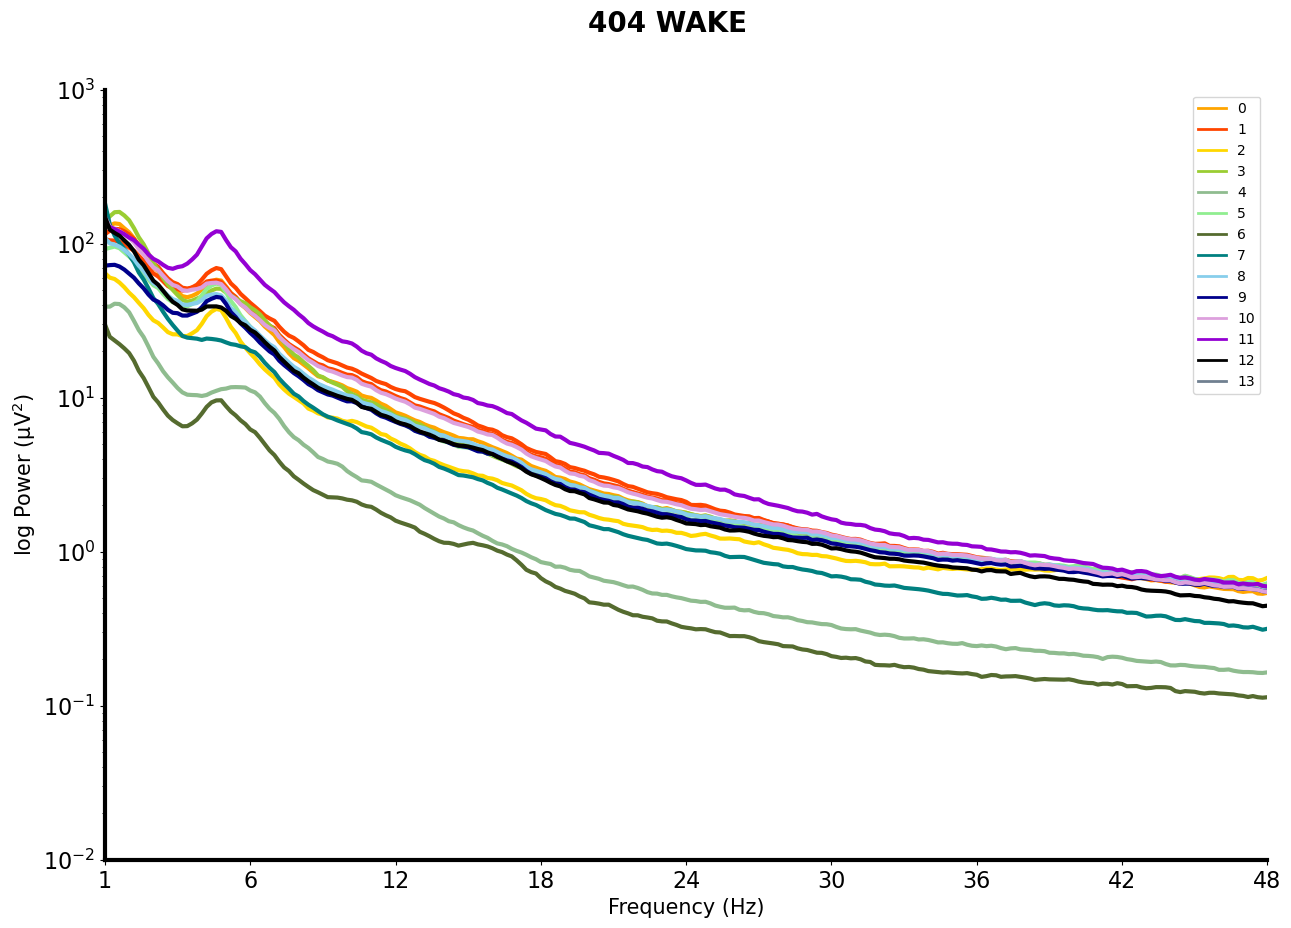

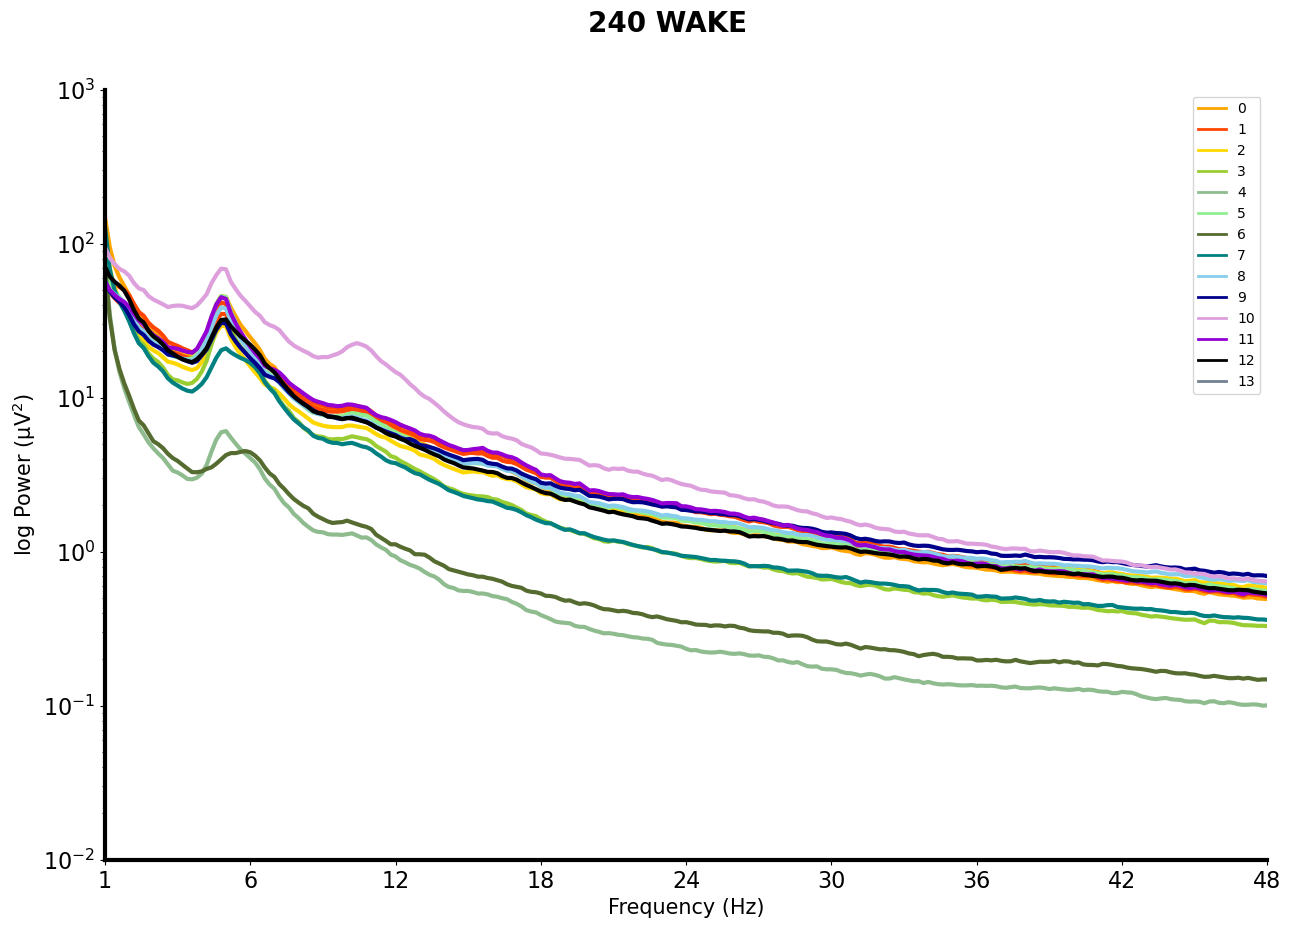

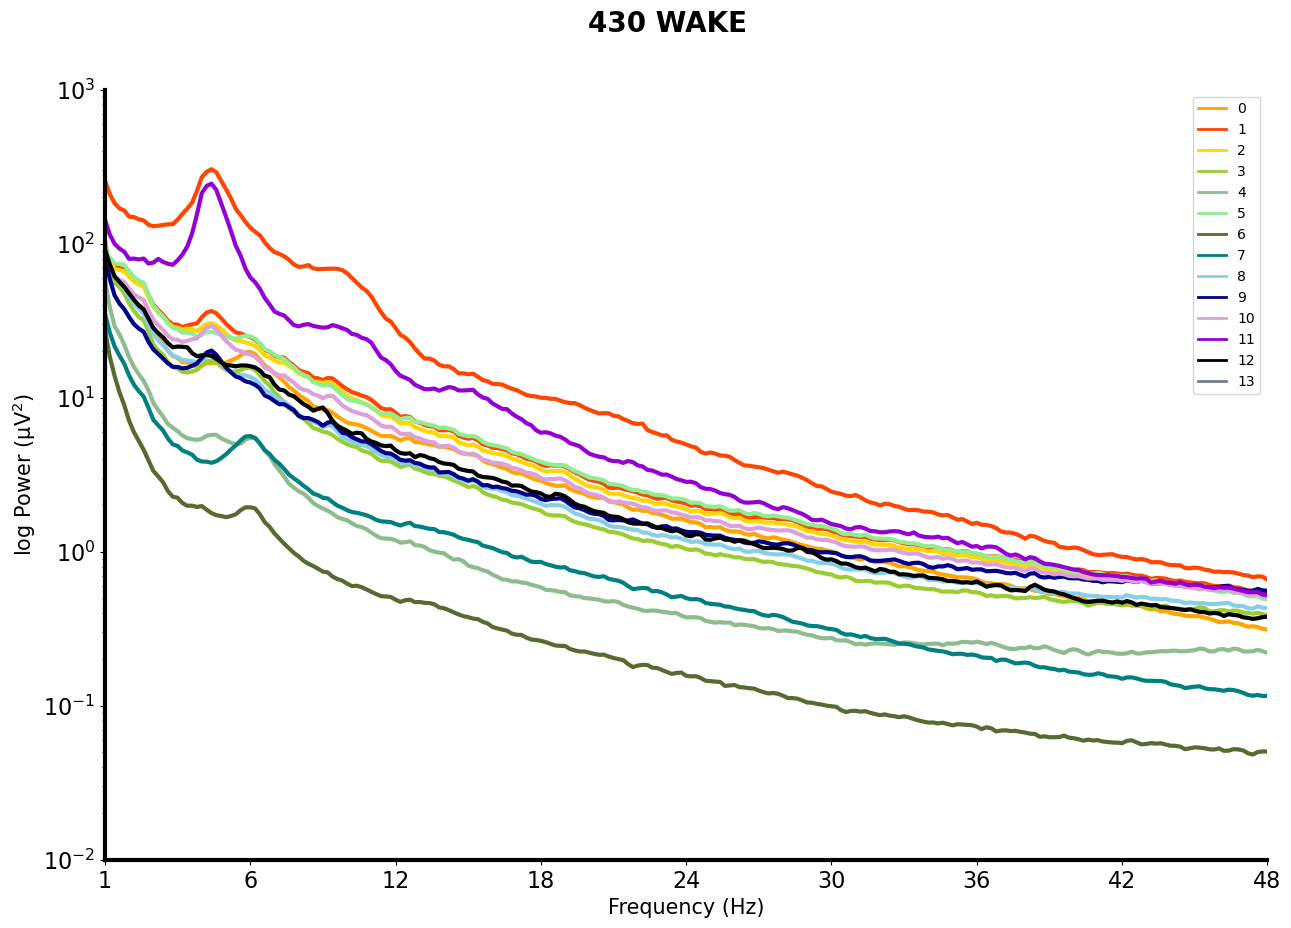

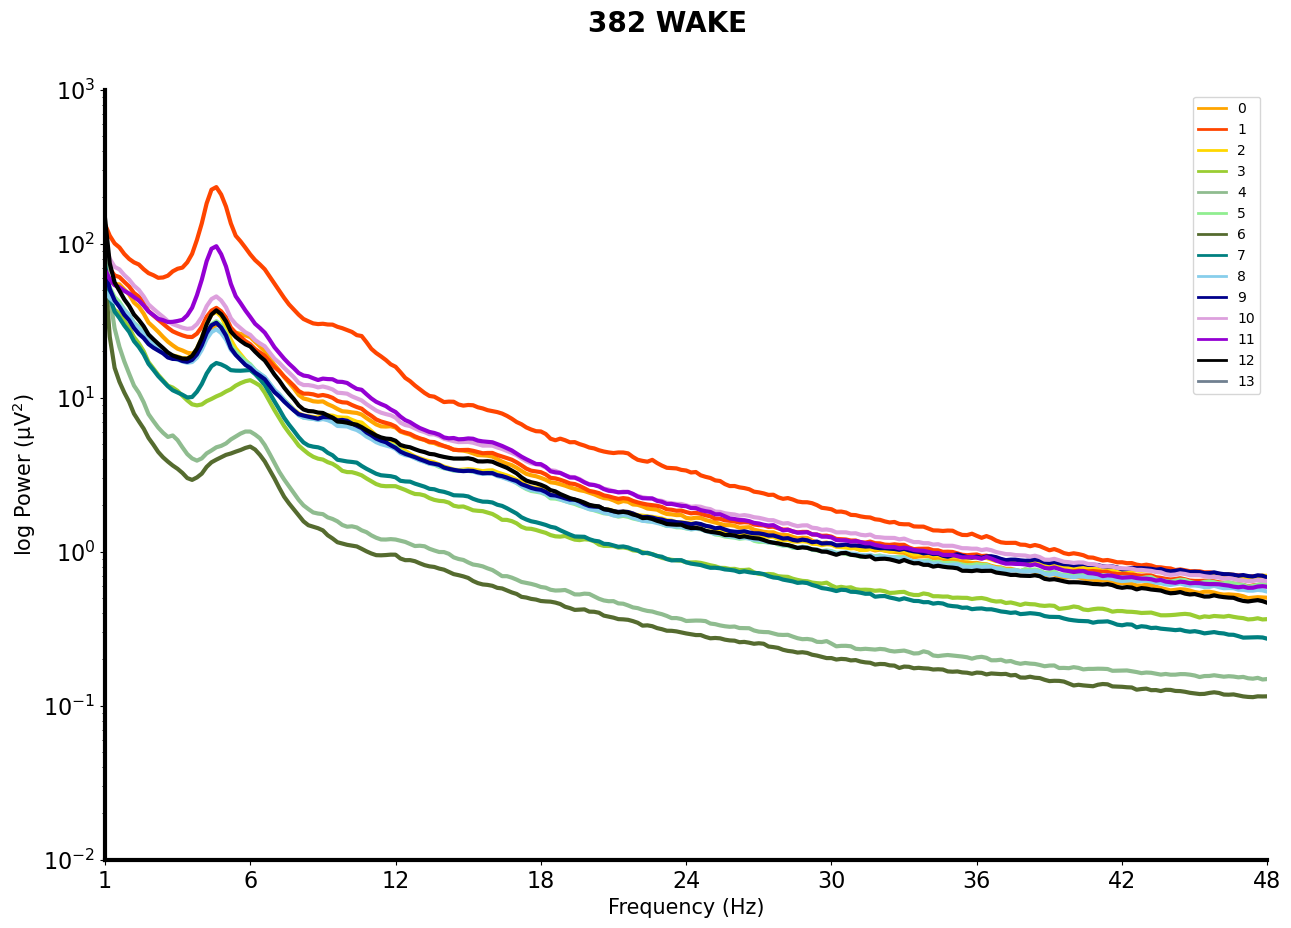

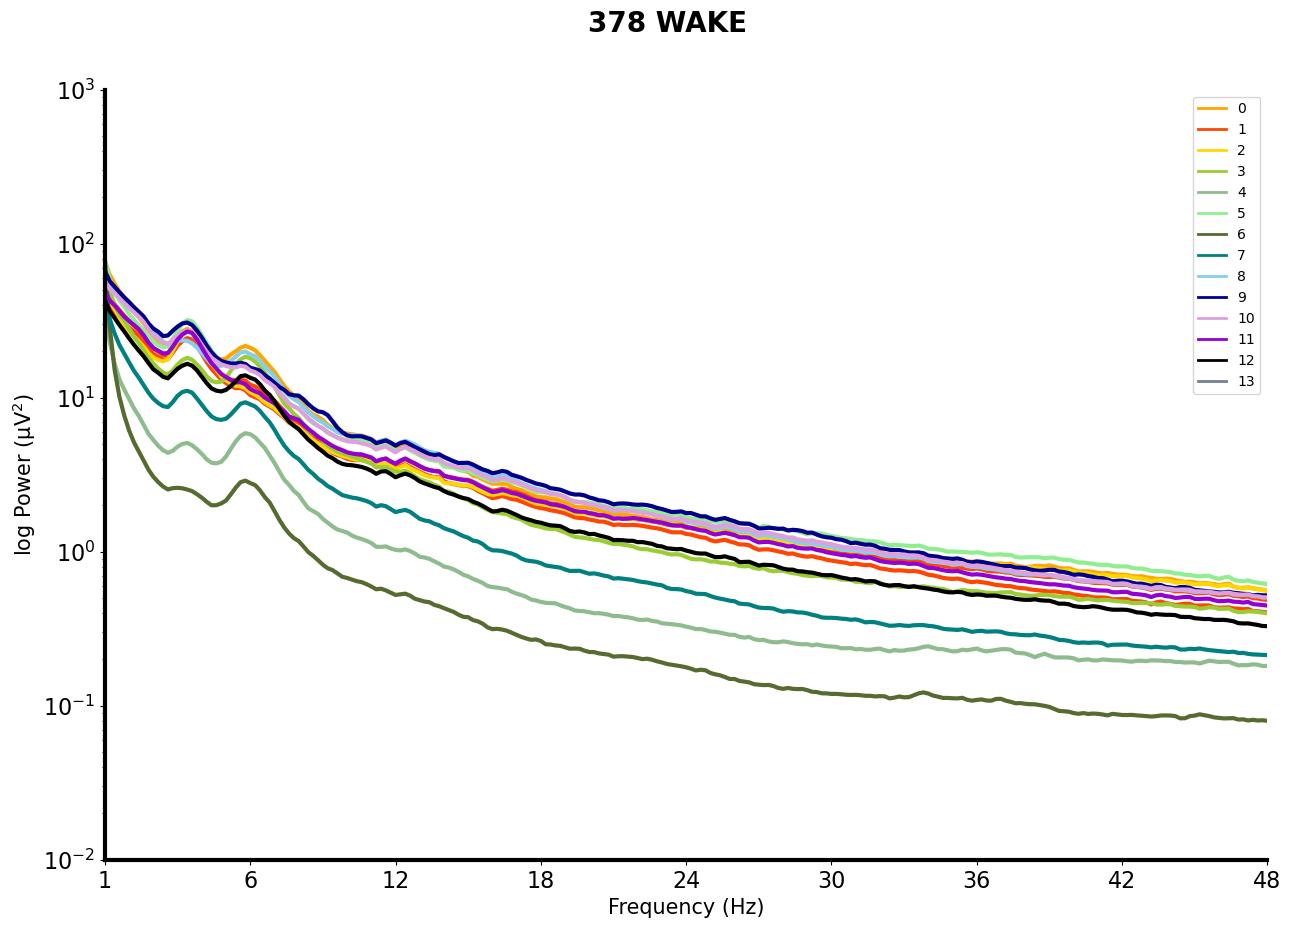

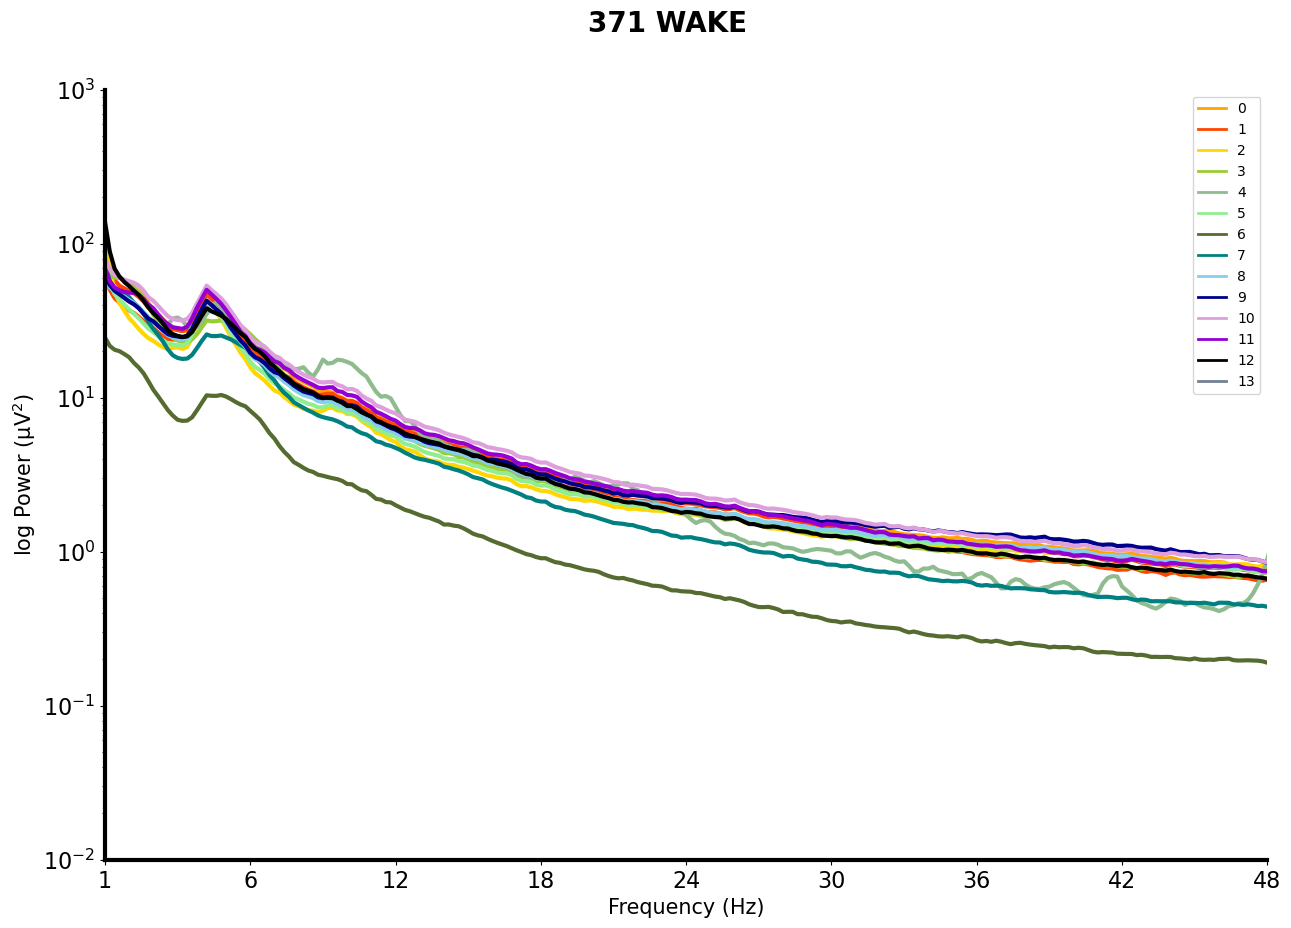

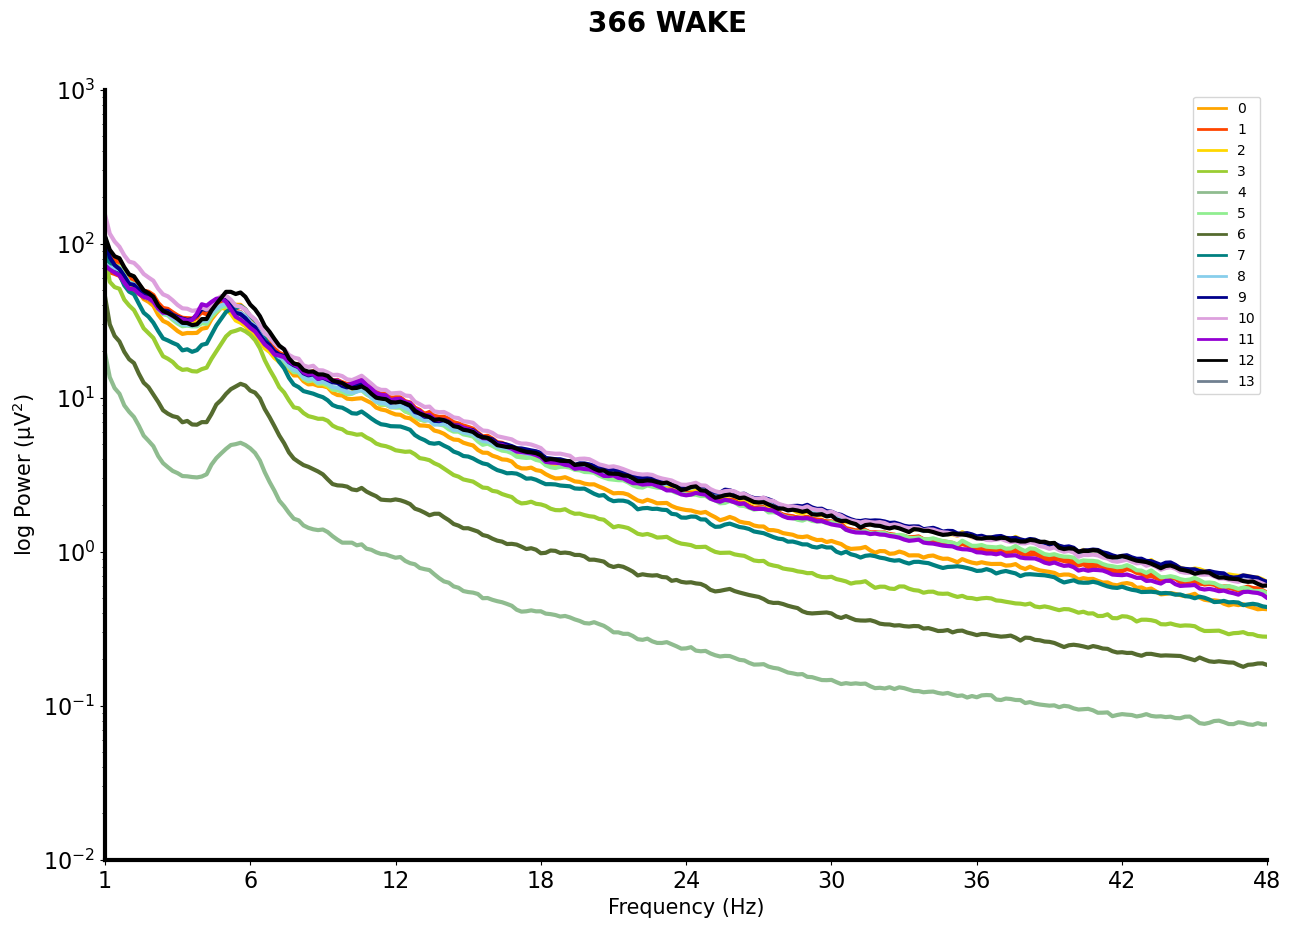

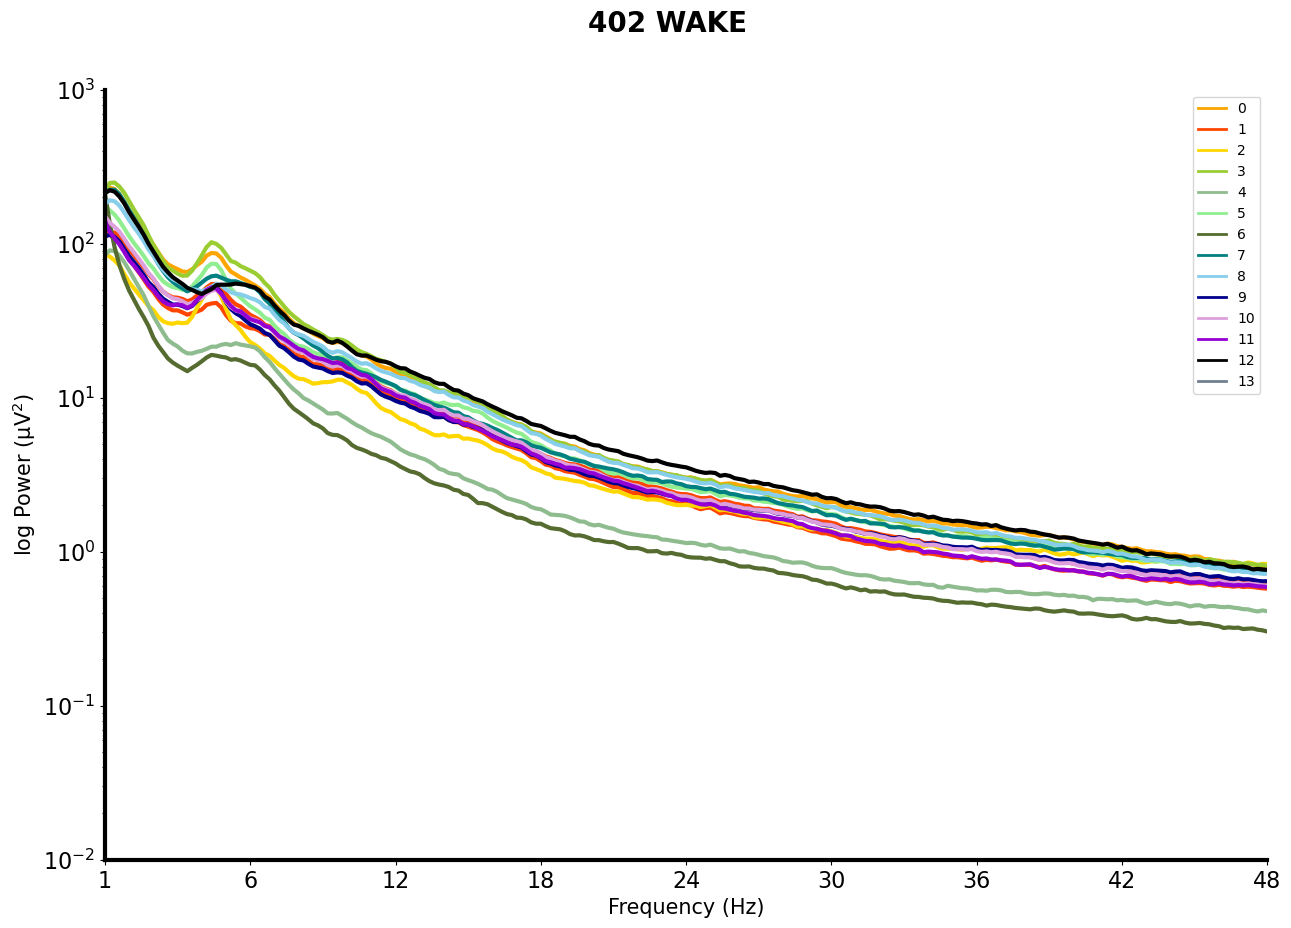

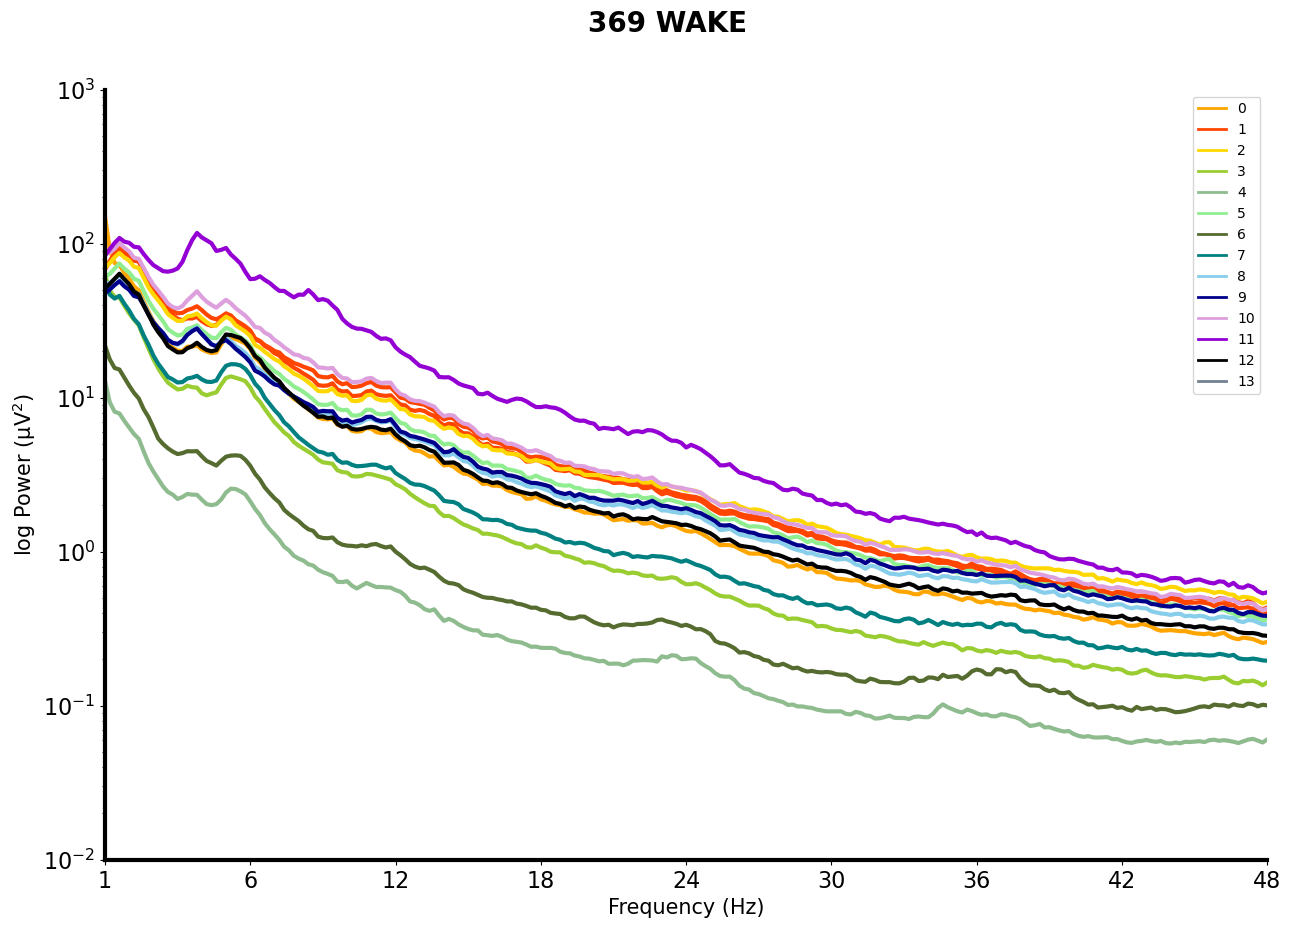

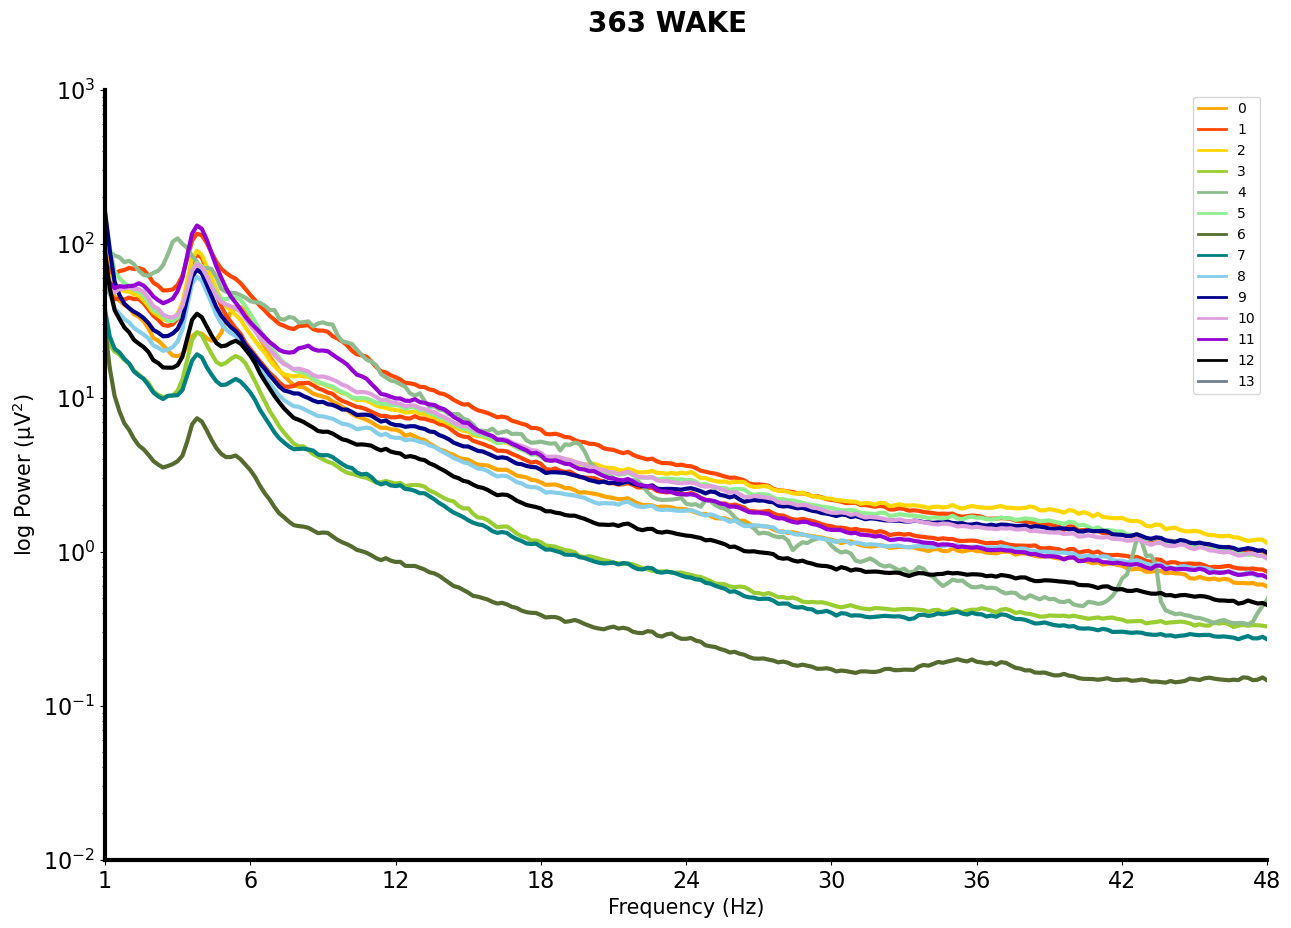

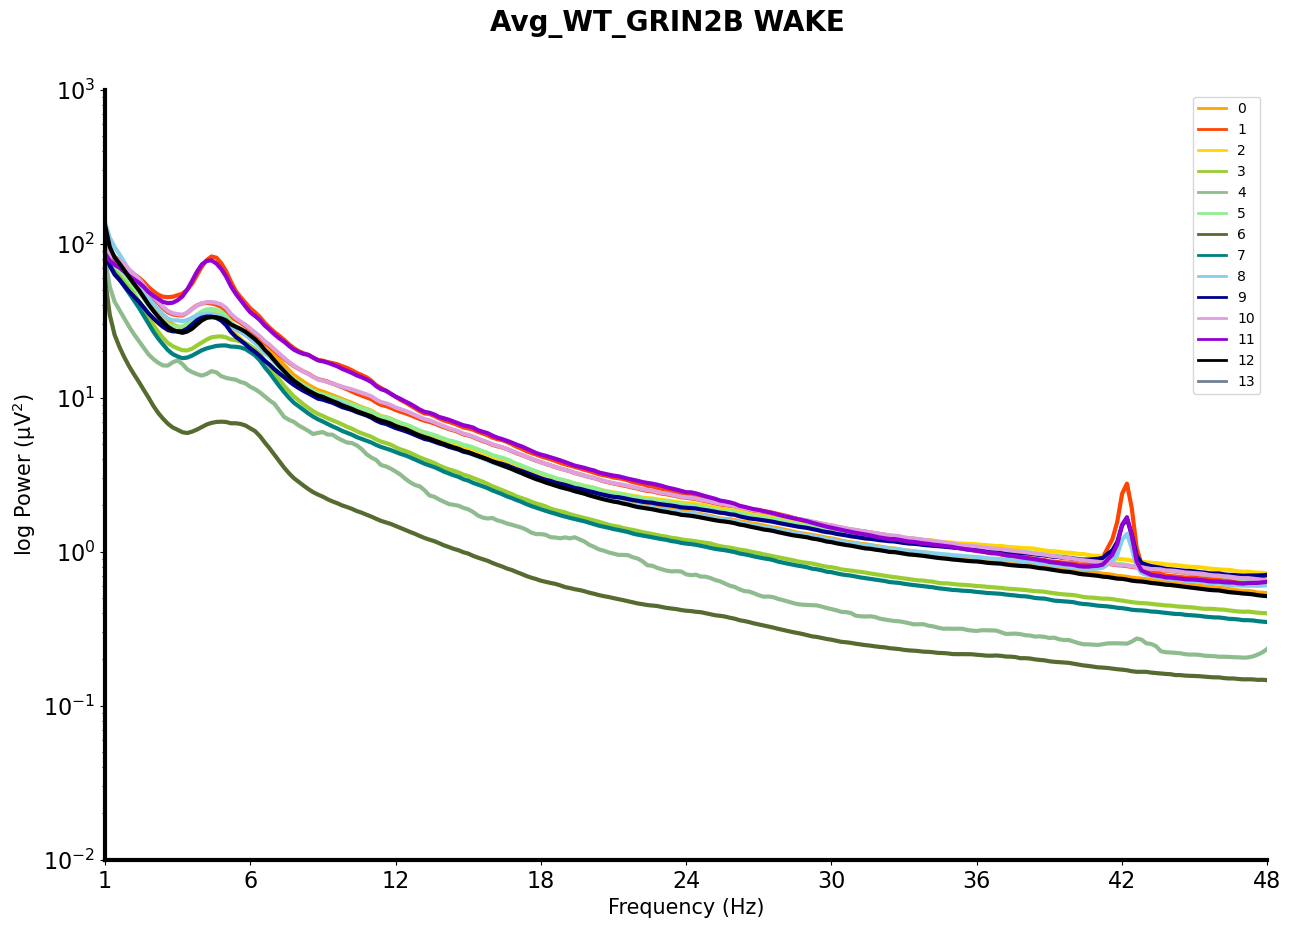

In [12]:
all_wts = []
total_epochs = []
for anim in id_list:
    print(anim)
    os.chdir('/home/melissa/RESULTS/GRIN2B/Entire_Power_Arrays/WT/' + sleepstage + '/')
    br_1 = np.load(str(anim) + '_power_BR_1.npy')
    br_2 = np.load(str(anim) + '_power_BR_2.npy')
    total_br = np.concatenate([br_1, br_2])
    numb_epochs = len(br_1) + len(br_2)
    per_animal_total = {'Animal_ID': str(anim), 'Total Epochs': [numb_epochs]}
    total_epochs.append(pd.DataFrame(data = per_animal_total))
    avg_array = average_power_arrays(total_br)
    all_wts.append(avg_array)
    np.save('/home/melissa/RESULTS/GRIN2B/Entire_Power_Arrays/AVERAGE/' + sleepstage + '/WT/' + str(anim) + '_avg_array.npy', avg_array)
    plot_animals_by_channels(anim, avg_array, channel_list, plot_colors, sleepstage = sleepstage, save_directory = save_directory)

avg_wt = np.mean(np.array(all_wts), axis = 0)
save_directory_avg = '/home/melissa/RESULTS/GRIN2B/Entire_Power_Arrays/PLOTS/' + sleepstage + '/'
plot_animals_by_channels('Avg_WT_GRIN2B', avg_wt, channel_list, plot_colors, sleepstage = sleepstage, save_directory = save_directory_avg)
np.save(save_directory_avg + 'avg_wt_power_' + sleepstage  + '.npy', avg_wt)

In [17]:
total_epochs_per_animal = pd.concat(total_epochs)
os.chdir('/home/melissa/RESULTS/GRIN2B/Entire_Power_Arrays/PLOTS/' + sleepstage)
total_epochs_per_animal.to_csv('total_epochs_per_animal_wt.csv')

#  Comparing avg of het and wt in each sleepstage in Channel 2

In [3]:
sleepstage = 'REM'

In [4]:
channels = [0,2,3,4,5,6,7,8,9,10,11,12,13,15]
frequency = np.arange(0, 125.4, 0.2)
len(frequency)

627

In [5]:
os.chdir('/home/melissa/RESULTS/GRIN2B/Entire_Power_Arrays/AVERAGE/' + sleepstage + '/HET/')
animal_df_het = []
for file in os.listdir('/home/melissa/RESULTS/GRIN2B/Entire_Power_Arrays/AVERAGE/' + sleepstage + '/HET/'):
    average_array = np.load(file)
    anim_id = file[0:3]
    print(anim_id)
    chan_df = []
    for chan, chan_power in zip(channels, average_array):
        power_dict = {'Animal_ID': [str(anim_id)]*len(chan_power), 'Channel': [chan]*len(chan_power), 
                   'Genotype': ['Het']*len(chan_power), 'Frequency': frequency,'Power': chan_power}
        power_df = pd.DataFrame(data = power_dict)
        chan_df.append(power_df)
    animal_df = pd.concat(chan_df)
    animal_df_het.append(animal_df)

239
424
228
364
139
367
130
237
129
229
241
368
227
236
433
373
131
137
138


In [6]:
os.chdir('/home/melissa/RESULTS/GRIN2B/Entire_Power_Arrays/AVERAGE/' + sleepstage + '/WT/')
animal_df_wt = []
for file in os.listdir('/home/melissa/RESULTS/GRIN2B/Entire_Power_Arrays/AVERAGE/' + sleepstage + '/WT/'):
    if file == '.ipynb_checkpoints':
        pass
    else:
        average_array = np.load(file)
        anim_id = file[0:3]
        print(anim_id)
        chan_df = []
        for chan, chan_power in zip(channels, average_array):
            power_dict = {'Animal_ID': [str(anim_id)]*len(chan_power), 'Channel': [chan]*len(chan_power), 
                   'Genotype': ['WT']*len(chan_power), 'Frequency': frequency,'Power': chan_power}
            power_df = pd.DataFrame(data = power_dict)
            chan_df.append(power_df)
        animal_df = pd.concat(chan_df)
        animal_df_wt.append(animal_df)

369
371
375
404
402
378
365
362
430
366
401
383
240
363
140
382
132
238


In [7]:
het = pd.concat(animal_df_het)
wt = pd.concat(animal_df_wt)
concat_file = pd.concat([het, wt])
os.chdir('/home/melissa/RESULTS/GRIN2B/Entire_Power_Arrays/AVERAGE')
concat_file.to_csv(sleepstage + '_all_animals_avg.csv')

In [8]:
concat_file

Animal_ID  Channel Genotype  Frequency         Power
0         239        0      Het        0.0  1.491135e+01
1         239        0      Het        0.2  6.411188e+01
2         239        0      Het        0.4  5.542980e+01
3         239        0      Het        0.6  2.716253e+01
4         239        0      Het        0.8  1.794064e+01
..        ...      ...      ...        ...           ...
622       238       15       WT      124.4  1.591547e-14
623       238       15       WT      124.6  1.580953e-14
624       238       15       WT      124.8  1.573507e-14
625       238       15       WT      125.0  1.569038e-14
626       238       15       WT      125.2  7.837754e-15

[324786 rows x 5 columns]

In [9]:
chan_2 = concat_file.loc[concat_file['Channel'] == 2]
chan_2

Animal_ID  Channel Genotype  Frequency         Power
0         239        2      Het        0.0  5.400786e+01
1         239        2      Het        0.2  2.783028e+02
2         239        2      Het        0.4  2.501937e+02
3         239        2      Het        0.6  9.680020e+01
4         239        2      Het        0.8  4.192609e+01
..        ...      ...      ...        ...           ...
622       238        2       WT      124.4  1.724538e-14
623       238        2       WT      124.6  1.713806e-14
624       238        2       WT      124.8  1.706330e-14
625       238        2       WT      125.0  1.701821e-14
626       238        2       WT      125.2  8.501603e-15

[23199 rows x 5 columns]

Text(0, 0.5, 'log Power (μ$\\mathregular{V^{2}}$)')

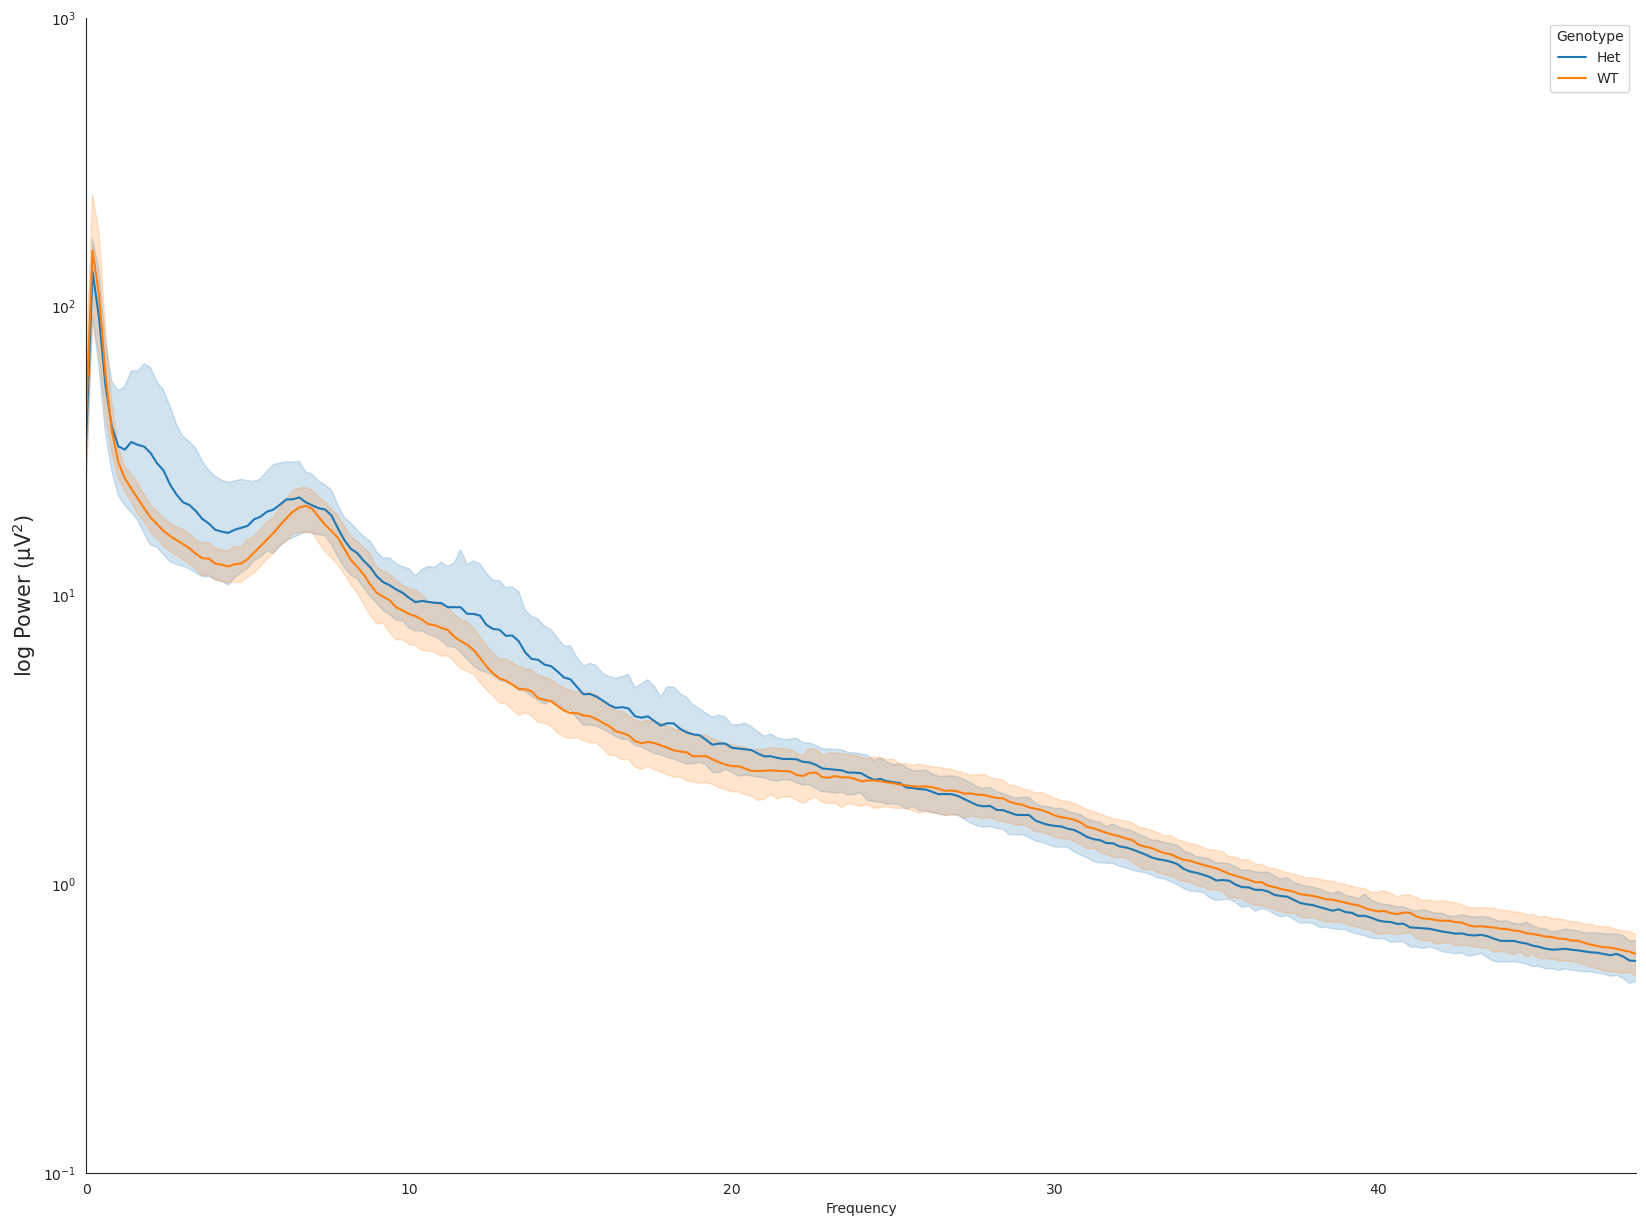

In [15]:
sns.set_style("white") 
fig, axs = plt.subplots(1,1, figsize=(20,15), sharex = True, sharey=True)
sns.lineplot(data=chan_2, x='Frequency', y='Power', hue='Genotype')
#plt.suptitle(str(genotype) + ' ' + str(sleepstage), fontsize = 30, fontweight = 'bold') 
sns.despine()
plt.yscale('log')
axs.set_xlim(0, 48)
axs.set(xlabel = 'Frequency')
axs.set_ylim(10**-1, 10**3)
axs.set_ylabel("log Power (\u03bc$\\mathregular{V^{2}}$)", fontsize = 15)
               